In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

## load data

In [2]:
#set the path
root = os.path.dirname(os.path.realpath(''))
data = os.path.join(root,'Data')
data

'D:\\Dortmund\\Case Study\\Data'

In [3]:
df = pd.read_csv(data+"\\all_households_smoothed.csv")
df = df[['date','ya_0', 'ya_1', 'ya_2', 'ya_3', 'ya_4', 'ya_5', 'ya_6',
       'ya_7', 'ya_8', 'ya_9', 'ya_10', 'ya_11', 'ya_12', 'ya_13', 'ya_14',
       'ya_15', 'ya_16', 'ya_17', 'ya_18', 'ya_19', 'ya_20', 'ya_21', 'ya_22',
       'ya_23','yb_0', 'yb_1', 'yb_2', 'yb_3', 'yb_4', 'yb_5', 'yb_6', 'yb_7',
       'yb_8', 'yb_9', 'yb_10', 'yb_11', 'yb_12', 'yb_13', 'yb_14', 'yb_15',
       'yb_16', 'yb_17', 'yb_18', 'yb_19', 'yb_20', 'yb_21', 'yb_22', 'yb_23',
       'household']]

In [4]:
pd.set_option('display.max_columns', 500)
df.head()

,date,ya_0,ya_1,ya_2,ya_3,ya_4,ya_5,ya_6,ya_7,ya_8,ya_9,ya_10,ya_11,ya_12,ya_13,ya_14,ya_15,ya_16,ya_17,ya_18,ya_19,ya_20,ya_21,ya_22,ya_23,yb_0,yb_1,yb_2,yb_3,yb_4,yb_5,yb_6,yb_7,yb_8,yb_9,yb_10,yb_11,yb_12,yb_13,yb_14,yb_15,yb_16,yb_17,yb_18,yb_19,yb_20,yb_21,yb_22,yb_23,household
0,2019-01-01,NaN,258.623868,219.704170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.341178,NaN,NaN,NaN,NaN,1469.909821,NaN,1098.064711,1724.732556,NaN,NaN,NaN,826.489743,799.064586,655.410763,361.739778,353.541245,457.969822,373.327867,397.389734,428.594011,449.354777,548.793967,433.749401,485.933822,523.325278,533.719757,585.885410,1145.520611,1278.981621,687.871134,635.505304,675.393873,607.006912,667.906901,883.808511,SFH10
1,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.108422,191.580600,366.615777,270.086978,606.604199,1504.291818,843.867133,630.696224,353.070955,385.870799,288.108600,448.902512,404.847334,411.934733,489.618933,182.064111,197.513556,909.217434,800.747231,553.882554,359.861722,338.943245,450.440045,431.531445,433.061301,384.368011,400.904156,439.642634,644.664201,644.722101,532.810999,925.792521,536.858800,867.671589,792.443170,1188.946257,1050.928166,1191.879457,711.292833,808.901385,492.270366,SFH10
2,2019-01-03,145.748978,163.525333,226.149044,201.983711,543.307579,NaN,274.448956,NaN,NaN,326.258799,415.855866,369.822511,750.459356,961.654268,811.846267,190.941222,438.684089,528.361710,389.644022,592.646155,403.165534,467.790711,234.986422,116.480244,518.288777,468.490090,421.932208,419.282022,362.024789,517.880267,386.609255,346.134422,364.867778,450.966059,672.452355,562.625590,481.056478,500.266156,615.716341,460.239430,646.382534,1158.986665,638.477901,693.508393,647.032660,662.172935,899.004444,633.310082,SFH10
3,2019-01-04,255.325156,176.847378,184.346200,140.751845,124.090267,209.358578,266.956645,623.385441,1469.786666,706.686709,741.229623,938.705468,478.143110,239.225267,228.493845,2160.622310,2833.751402,1332.293935,1019.141622,562.583333,1419.830268,622.953754,479.983977,302.765823,541.188289,522.967126,397.111178,386.849400,369.032244,481.644166,432.814511,379.897789,373.754193,433.916045,719.502623,696.330385,501.350814,553.276089,507.981200,556.601008,751.320251,1245.592726,691.497563,663.494822,650.762378,788.039912,719.085340,782.697074,SFH10
4,2019-01-05,184.656933,141.606488,185.821444,141.884689,258.689623,204.359133,120.200822,179.790378,973.634401,1027.132490,1457.095599,1640.525335,1553.097307,1650.000492,1099.136291,1217.742687,761.470555,420.153756,355.684622,372.935844,436.748466,411.924156,351.244333,295.922644,876.004052,507.004104,495.996326,397.420244,363.212704,351.400030,415.326696,362.464778,449.898726,538.435260,642.822378,1032.368709,804.605904,669.370208,719.422082,744.053489,712.233319,1167.841445,836.863142,737.265156,666.164386,694.065156,851.967979,791.345155,SFH10


In [7]:
df.columns

Index(['date', 'ya_0', 'ya_1', 'ya_2', 'ya_3', 'ya_4', 'ya_5', 'ya_6', 'ya_7',
       'ya_8', 'ya_9', 'ya_10', 'ya_11', 'ya_12', 'ya_13', 'ya_14', 'ya_15',
       'ya_16', 'ya_17', 'ya_18', 'ya_19', 'ya_20', 'ya_21', 'ya_22', 'ya_23',
       'yb_0', 'yb_1', 'yb_2', 'yb_3', 'yb_4', 'yb_5', 'yb_6', 'yb_7', 'yb_8',
       'yb_9', 'yb_10', 'yb_11', 'yb_12', 'yb_13', 'yb_14', 'yb_15', 'yb_16',
       'yb_17', 'yb_18', 'yb_19', 'yb_20', 'yb_21', 'yb_22', 'yb_23',
       'household'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np

def analyze_missing_hourly_data(df, prefix, date_col='date', household_col='household'):
    # Filter columns
    hourly_cols = [f"{prefix}_{i}" for i in range(24)]
    required_cols = [date_col, household_col] + hourly_cols
    df = df[required_cols].copy()

    # Melt to long format to count missing hourly values
    df_long = df.melt(id_vars=[date_col, household_col], 
                      value_vars=hourly_cols,
                      var_name='hour', value_name='value')

    # Count missing values per date per household
    missing_per_day = df_long[df_long['value'].isna()] \
        .groupby([household_col, date_col]).size().reset_index(name='missing_hours')

    # Add 0-missing entry for households-dates with full data
    all_dates = df[[date_col, household_col]].drop_duplicates()
    missing_per_day = all_dates.merge(missing_per_day, on=[household_col, date_col], how='left').fillna({'missing_hours': 0})

    # Count completely missing days (all 24 hours missing)
    completely_missing_days = missing_per_day[missing_per_day['missing_hours'] == 24] \
        .groupby(household_col).size().rename("completely_missing_days").reset_index()

    # Total expected values per household = 365 * 24 = 8760
    total_expected = 365 * 24

    # Actual number of missing values per household
    total_missing = df_long[df_long['value'].isna()] \
        .groupby(household_col).size().rename("missing_values").reset_index()

    # Merge and calculate percentage
    summary = pd.merge(total_missing, completely_missing_days, on=household_col, how='outer').fillna(0)
    summary['missing_percentage'] = (summary['missing_values'] / total_expected) * 100

    return missing_per_day, summary


In [9]:
# For ya columns
missing_ya_per_day, summary_ya = analyze_missing_hourly_data(df, prefix='ya')

# For yb columns
#missing_yb_per_day, summary_yb = analyze_missing_hourly_data(df, prefix='yb')


In [10]:
summary_ya

,household,missing_values,completely_missing_days,missing_percentage
0,SFH10,134,0.0,1.529680
1,SFH11,134,0.0,1.529680
2,SFH12,134,0.0,1.529680
3,SFH14,134,0.0,1.529680
4,SFH16,134,0.0,1.529680
5,SFH17,115,0.0,1.312785
6,SFH18,134,0.0,1.529680
7,SFH19,134,0.0,1.529680
8,SFH20,134,0.0,1.529680
9,SFH21,134,0.0,1.529680


In [11]:
missing_ya_per_day

,date,household,missing_hours
0,2019-01-01,SFH10,18.0
1,2019-01-02,SFH10,7.0
2,2019-01-03,SFH10,3.0
3,2019-01-04,SFH10,0.0
4,2019-01-05,SFH10,0.0
...,...,...,...
11212,2019-12-27,SFH9,0.0
11213,2019-12-28,SFH9,0.0
11214,2019-12-29,SFH9,0.0
11215,2019-12-30,SFH9,0.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_heatmap(missing_df, title='Missing Hours per Day per Household'):
    # Pivot the table: rows = household, columns = date, values = missing hours
    heatmap_data = missing_df.pivot(index='household', columns='date', values='missing_hours')

    # Sort dates for correct time axis
    heatmap_data = heatmap_data.sort_index(axis=1)

    # Plot
    plt.figure(figsize=(20, 8))
    sns.heatmap(heatmap_data, cmap='viridis_r', cbar_kws={'label': 'Missing Hours'}, linewidths=0.1, linecolor='gray')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Household')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


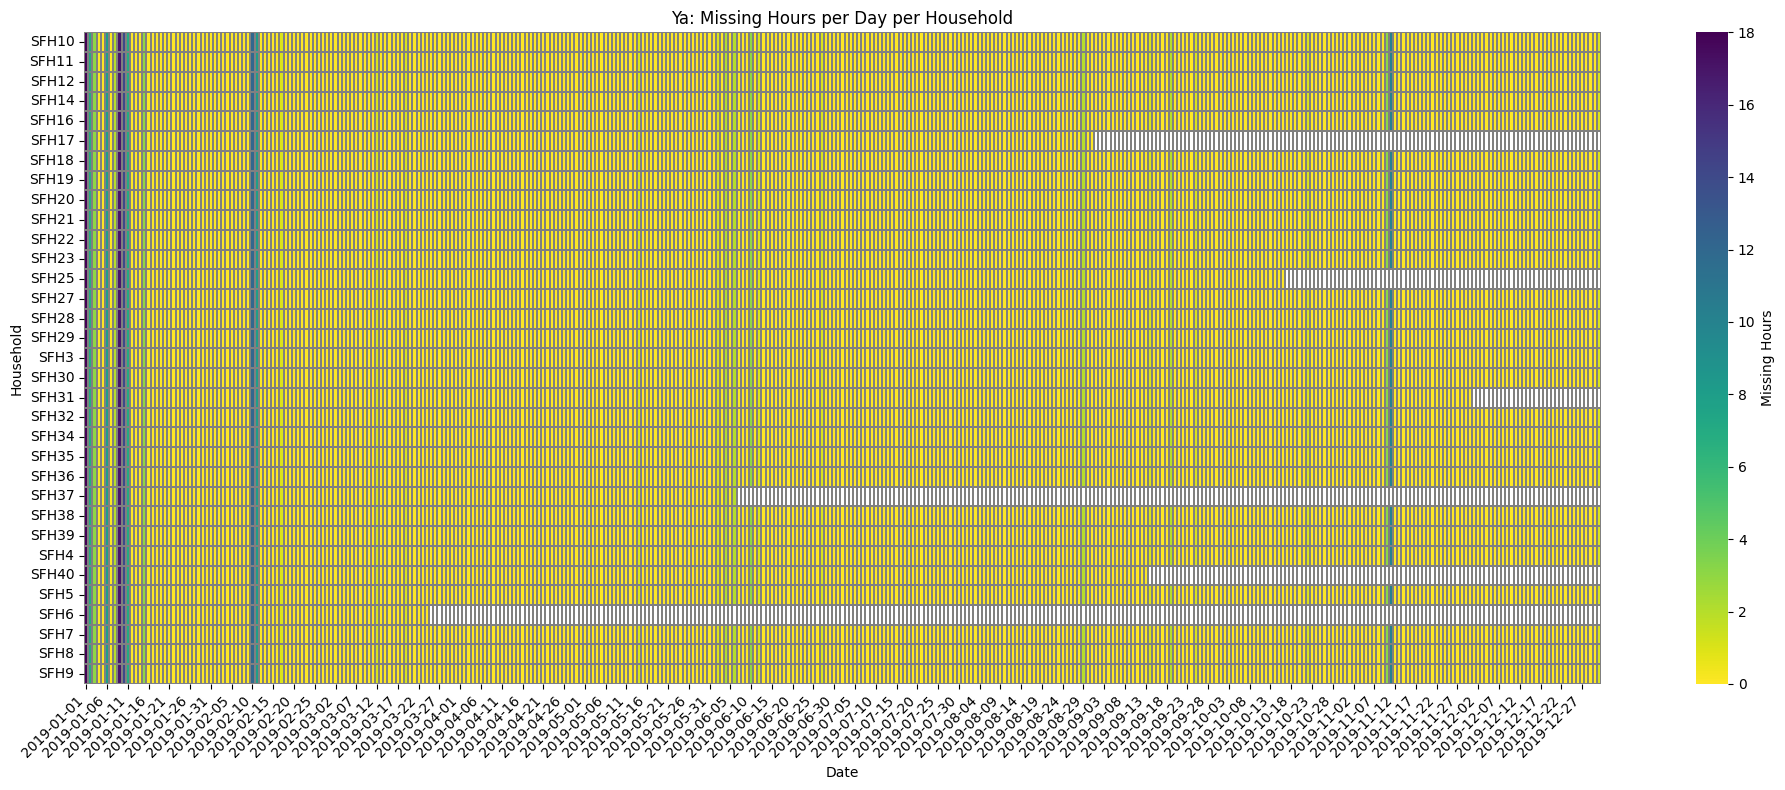

In [13]:
plot_missing_heatmap(missing_ya_per_day, title='Ya: Missing Hours per Day per Household')

In [14]:
missing_yb_per_day, summary_yb = analyze_missing_hourly_data(df, prefix='yb')

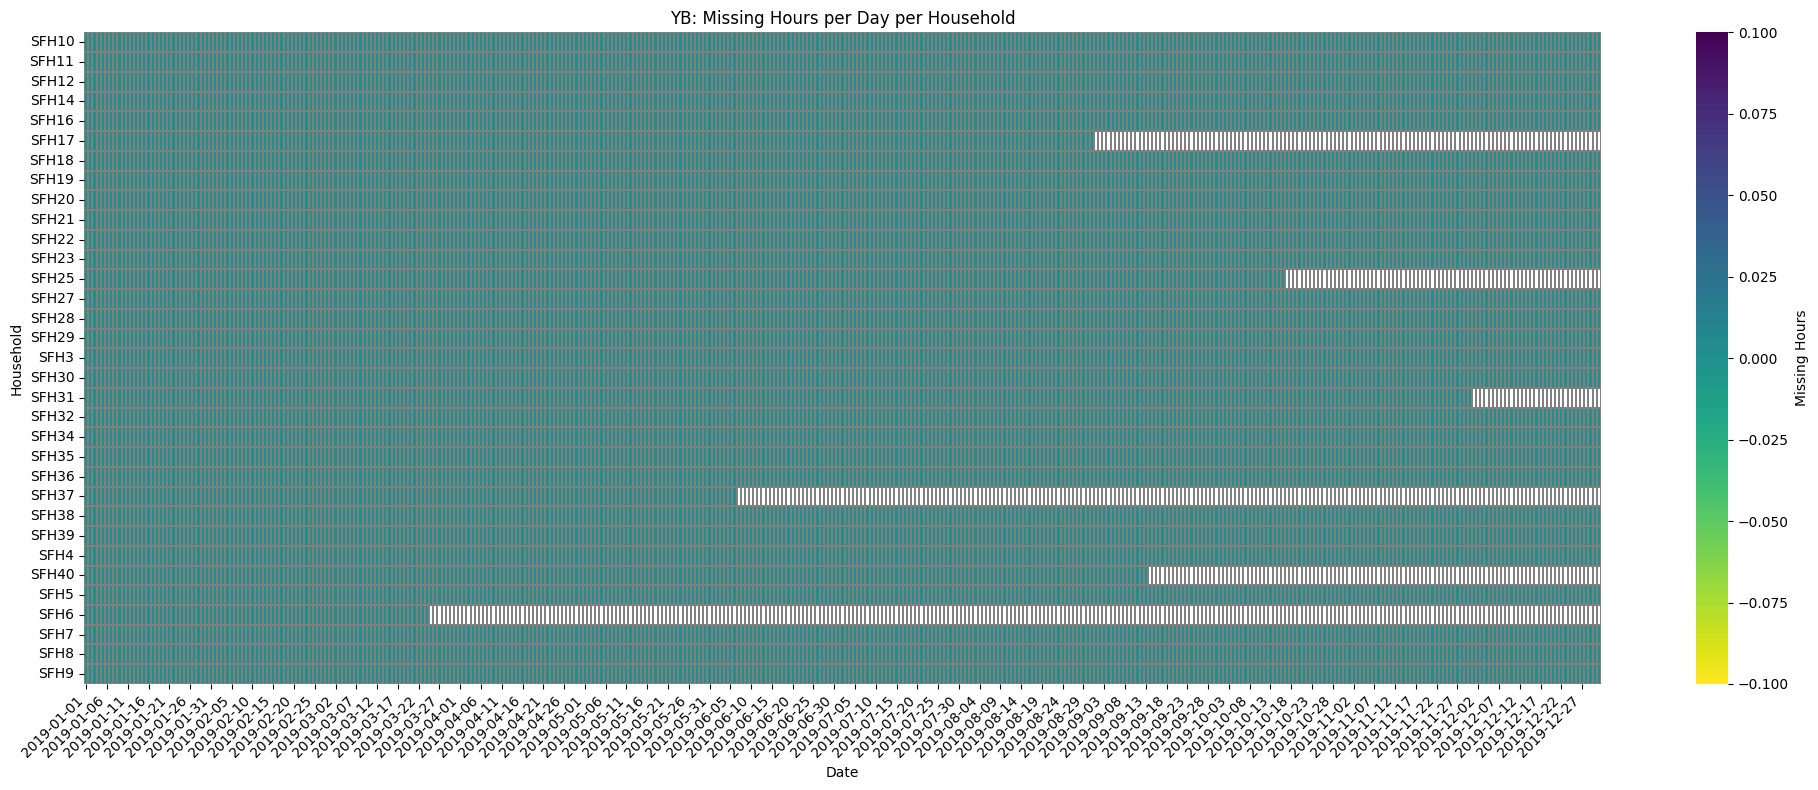

In [15]:
plot_missing_heatmap(missing_yb_per_day, title='YB: Missing Hours per Day per Household')

In [16]:
df.isnull().sum()

date           0
ya_0         160
ya_1         126
ya_2          94
ya_3         193
ya_4         226
ya_5         292
ya_6         226
ya_7         226
ya_8         160
ya_9          94
ya_10        127
ya_11        164
ya_12        194
ya_13        192
ya_14        165
ya_15        132
ya_16        226
ya_17        130
ya_18        198
ya_19        191
ya_20        224
ya_21        193
ya_22        190
ya_23        187
yb_0           0
yb_1           0
yb_2           0
yb_3           0
yb_4           0
yb_5           0
yb_6           0
yb_7           0
yb_8           0
yb_9           0
yb_10          0
yb_11          0
yb_12          0
yb_13          0
yb_14          0
yb_15          0
yb_16          0
yb_17          0
yb_18          0
yb_19          0
yb_20          0
yb_21          0
yb_22          0
yb_23          0
household      0
dtype: int64

In [17]:
df.shape

(11217, 50)

In [18]:
def find_missing_dates(df, date_col='date', household_col='household'):
    # Ensure date column is datetime
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Get all households
    households = df[household_col].unique()

    # Generate full year date range (assumes data should cover one year)
    full_date_range = pd.date_range(start='2019-01-01', end='2019-12-31')

    # Dictionary to store missing dates per household
    missing_dates_dict = {}

    for household in households:
        # Get the dates present for this household
        present_dates = df[df[household_col] == household][date_col].unique()
        present_dates = pd.to_datetime(present_dates)

        # Find missing dates
        missing_dates = sorted(set(full_date_range) - set(present_dates))

        if missing_dates:
            missing_dates_dict[household] = missing_dates

    return missing_dates_dict


In [19]:
missing_dates_per_household = find_missing_dates(df)
missing_dates_per_household

{'SFH17': [Timestamp('2019-09-01 00:00:00'),
  Timestamp('2019-09-02 00:00:00'),
  Timestamp('2019-09-03 00:00:00'),
  Timestamp('2019-09-04 00:00:00'),
  Timestamp('2019-09-05 00:00:00'),
  Timestamp('2019-09-06 00:00:00'),
  Timestamp('2019-09-07 00:00:00'),
  Timestamp('2019-09-08 00:00:00'),
  Timestamp('2019-09-09 00:00:00'),
  Timestamp('2019-09-10 00:00:00'),
  Timestamp('2019-09-11 00:00:00'),
  Timestamp('2019-09-12 00:00:00'),
  Timestamp('2019-09-13 00:00:00'),
  Timestamp('2019-09-14 00:00:00'),
  Timestamp('2019-09-15 00:00:00'),
  Timestamp('2019-09-16 00:00:00'),
  Timestamp('2019-09-17 00:00:00'),
  Timestamp('2019-09-18 00:00:00'),
  Timestamp('2019-09-19 00:00:00'),
  Timestamp('2019-09-20 00:00:00'),
  Timestamp('2019-09-21 00:00:00'),
  Timestamp('2019-09-22 00:00:00'),
  Timestamp('2019-09-23 00:00:00'),
  Timestamp('2019-09-24 00:00:00'),
  Timestamp('2019-09-25 00:00:00'),
  Timestamp('2019-09-26 00:00:00'),
  Timestamp('2019-09-27 00:00:00'),
  Timestamp('2019-0

In [20]:
missing_dates_per_household.keys()

dict_keys(['SFH17', 'SFH25', 'SFH31', 'SFH37', 'SFH40', 'SFH6'])

In [21]:
print(len(missing_dates_per_household['SFH17']))
print(len(missing_dates_per_household['SFH25']))
print(len(missing_dates_per_household['SFH31']))
print(len(missing_dates_per_household['SFH37']))
print(len(missing_dates_per_household['SFH40']))
print(len(missing_dates_per_household['SFH6']))

122
76
31
208
109
282


## Feature Engineering

In [22]:
#df['household'] = df['household'].apply(lambda x: int(x.split('H')[1]))
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] =df['date'].dt.dayofyear

# Define March 21 as the reference day
march_21_dayofyear = pd.Timestamp('2025-03-21').dayofyear 

# Shift day of year relative to March 21
df['shifted_day'] = (df['day_of_year'] - march_21_dayofyear) % 365

# Create season column using sine function
df['season_sin'] = np.sin(2 * np.pi * df['shifted_day'] / 365)
df['is_weekend'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)
# Convert to categorical type
df['household'] = df['household'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')


In [23]:
og_df = df.copy()  #create a copy of the dataset 

## 2 

In [24]:
df['household']

0        SFH10
1        SFH10
2        SFH10
3        SFH10
4        SFH10
         ...  
11212     SFH9
11213     SFH9
11214     SFH9
11215     SFH9
11216     SFH9
Name: household, Length: 11217, dtype: category
Categories (33, object): ['SFH10', 'SFH11', 'SFH12', 'SFH14', ..., 'SFH6', 'SFH7', 'SFH8', 'SFH9']

In [25]:
## random 30 household
random_30 = ['SFH31', 'SFH36', 'SFH21', 'SFH16', 'SFH32', 'SFH7', 'SFH5', 'SFH38', 'SFH3', 'SFH18', 'SFH29', 'SFH39', 'SFH8', 'SFH19', 'SFH20', 'SFH17', 'SFH28', 'SFH10', 'SFH22', 'SFH40', 'SFH30', 'SFH34', 'SFH14', 'SFH25', 'SFH6', 'SFH11', 'SFH12', 'SFH9', 'SFH27', 'SFH35']

In [26]:
len(random_30)

30

In [28]:
new_df= df[df['household'].isin(random_30)]

In [29]:
new_df.shape

(10330, 55)

In [30]:
df = new_df.dropna()
df.shape

(9494, 55)

In [31]:
# List of dependent variables (ya_* and yb_*)
def manova_test(df, y):
    dependent_vars = [col for col in df.columns if  col.startswith('yb_')]
    # Independent variables
    independent_vars = ['day_of_year','day_of_week','season_sin'] 
    # Create the formula for MANOVA
    formula = f"{' + '.join(dependent_vars)} ~ {' + '.join(independent_vars)}"
    formula1 = f"{' + '.join(dependent_vars)} ~ {' * '.join(independent_vars)}"
    # Apply MANOVA
    maov = MANOVA.from_formula(formula, data=df)
    result_without_interaction = maov.mv_test()
    maov = MANOVA.from_formula(formula1, data=df)
    result_with_interaction = maov.mv_test()
    return result_without_interaction , result_with_interaction

In [32]:
result_without_int_a , result_with_int_a = manova_test(df, 'ya_')
result_without_int_b , result_with_int_b = manova_test(df, 'yb_')

In [33]:
## are we including household variable for manova test?

In [34]:
print("Manova result for Ya's")
print(result_without_int_a)
print("*"*60)
print(result_with_int_a)

Manova result for Ya's
                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
        Intercept        Value   Num DF   Den DF  F Value  Pr > F
-----------------------------------------------------------------
           Wilks' lambda 0.6079 24.0000 9462.0000 254.3266 0.0000
          Pillai's trace 0.3921 24.0000 9462.0000 254.3266 0.0000
  Hotelling-Lawley trace 0.6451 24.0000 9462.0000 254.3266 0.0000
     Roy's greatest root 0.6451 24.0000 9462.0000 254.3266 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
      day_of_week       Value   Num DF    Den DF   F Value Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.7637 144.0000 55305.8682 18.1349 0.0000
       

In [35]:
print("Manova result for Yb's")
print(result_without_int_b)
print("*"*60)
print(result_with_int_b)

Manova result for Yb's
                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
        Intercept        Value   Num DF   Den DF  F Value  Pr > F
-----------------------------------------------------------------
           Wilks' lambda 0.6079 24.0000 9462.0000 254.3266 0.0000
          Pillai's trace 0.3921 24.0000 9462.0000 254.3266 0.0000
  Hotelling-Lawley trace 0.6451 24.0000 9462.0000 254.3266 0.0000
     Roy's greatest root 0.6451 24.0000 9462.0000 254.3266 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
      day_of_week       Value   Num DF    Den DF   F Value Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.7637 144.0000 55305.8682 18.1349 0.0000
       

## using OLS model

In [36]:
def ols_model(df, target):
    # 1. Separate features and targets
    target_cols = [col for col in df.columns if col.startswith(target)]
    feature_cols = [col for col in df.columns if col not in target_cols + ['date','household']]  # drop 'date'
    X = df[feature_cols]
    Y = df[target_cols]
    # 2. Train model
    model = MultiOutputRegressor(LinearRegression())
    model.fit(X, Y)
    # 3. Predict and calculate residuals
    Y_pred = model.predict(X)
    residuals = Y.values - Y_pred
    # 4. Calculate total RSS
    RSS = np.sum(residuals ** 2)
    # 5. Calculate number of parameters
    n_samples, n_targets = Y.shape
    n_features = X.shape[1]
    k = n_targets * (n_features + 1)  # +1 for intercept term
    # 6. Calculate log likelihood
    sigma2 = RSS / (n_samples * n_targets)
    log_likelihood = -0.5 * n_samples * n_targets * (np.log(2 * np.pi * sigma2) + 1)
    # 7. Calculate AIC
    AIC = 2 * k - 2 * log_likelihood
    return AIC

In [37]:
ols_model(df, "ya_")

np.float64(3424243.7460808526)

In [38]:
ols_model(df, "yb_")

np.float64(3115048.2412642497)

## 3

In [39]:


def regression_model():
    results = []
    for household_id in df['household'].unique():
        df_house = df[df['household'] == household_id]
    
        # Drop rows with any NA in ya_0 to ya_23
        df_house = df_house.dropna(subset=ya_targets)
    
        try:
            # Construct equations as dict of formulas
            equations_no_inter = {
                f"ya_{i}": smf.ols(formula=f"ya_{i} ~ C(day_of_week) + season_sin", data=df_house) 
                for i in range(24)
            }
            equations_with_inter = {
                f"ya_{i}": smf.ols(formula=f"ya_{i} ~ C(day_of_week) + season_sin", data=df_house) 
                for i in range(24)
            }
    
            # Fit SUR
            sur_model = SUR(equations_no_inter)
            sur_result = sur_model.fit()
    
            results.append({
                "household": household_id,
                "loglik": sur_result.llf,
                "aic": sur_result.aic,
                "bic": sur_result.bic,
                "nobs": sur_result.nobs
            })
    
        except Exception as e:
            print(f"Error in SUR for household {household_id}: {e}")


In [41]:
# List of target columns
yb_targets = [f"yb_{i}" for i in range(24)]  
ya_targets = [f"ya_{i}" for i in range(24)]

def ols_model(df, targets):
    # Store results
    results = []
    coefficients = []
    
    # Loop through each unique household
    for household_id in df['household'].unique():
        df_house = df[df['household'] == household_id]
    
        for target in targets:
            #formula_no_interaction = f"{target} ~ season_sin + is_weekend"
            #formula_with_interaction = f"{target} ~ season_sin * is_weekend"
            formula_no_interaction = f"{target} ~ season_sin"
    
            try:
                model_no_inter = smf.ols(formula=formula_no_interaction, data=df_house).fit()
                #model_inter = smf.ols(formula=formula_with_interaction, data=df_house).fit()
    
                # AIC comparison
                results.append({
                    "household": household_id,
                    "target": target,
                    "AIC_no_inter": model_no_inter.aic,
                    #"AIC_with_inter": model_inter.aic,
                    #"interaction_helpful": model_inter.aic < model_no_inter.aic
                })
    
                # Store coefficients of the interaction model
                coeff = model_no_inter.params.to_dict()
                coeff["household"] = household_id
                coeff["target"] = target
                coefficients.append(coeff)
    
            except Exception as e:
                print(f"Error processing household {household_id}, target {target}: {e}")


    results_df = pd.DataFrame(results)
    coeffs_df = pd.DataFrame(coefficients)
    return results_df , coeffs_df

In [42]:
results_df_b_02 , coeffs_df_b_02 = ols_model(df, yb_targets)

In [43]:
results_df_a_02 , coeffs_df_a_02 = ols_model(df, ya_targets)

In [44]:
def wide_df(coeffs_df):
    df_wide = coeffs_df.pivot_table(
        index='household',
        columns='target',
        #values=['Intercept','season_sin', 'is_weekend']
        values=['Intercept','season_sin']
    )
    # Step 3: Flatten MultiIndex columns
    df_wide.columns = [f"{var}_{i}" for var, i in df_wide.columns]
    
    # Step 4: Reset index to make household a column
    df_wide = df_wide.reset_index()
    return df_wide


In [45]:
yb_coeffs_wide = wide_df(coeffs_df_b_02)
ya_coeffs_wide = wide_df(coeffs_df_a_02)

In [46]:
def data_scale(df_wide):
    # Assume df_wide is your wide-form DataFrame
    X = df_wide.drop(columns=['household'])
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)   
    return X_scaled, scaler
    
def elbow_silhouette(X_scaled):  
    inertia = []
    silhouette_scores = []
    k_range = range(2, 11)  # Silhouette score is undefined for k=1
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = km.fit_predict(X_scaled)
        inertia.append(km.inertia_)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 5))
    # Inertia Plot
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    
    # Silhouette Score Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o', color='orange')
    plt.title('Silhouette Scores For Different k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

D:\Dortmund\Case Study\case_study\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\Dortmund\Case Study\case_study\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\Dortmund\Case Study\case_study\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
D:\Dortmund\Case Study\case_study\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


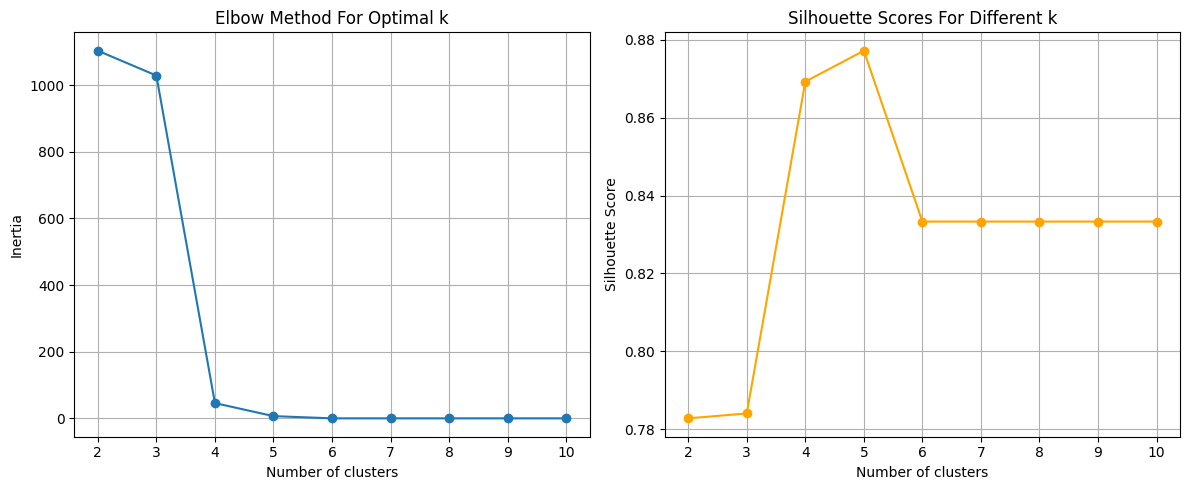

In [47]:
ya_scaled, scaler_a = data_scale(ya_coeffs_wide)
elbow_silhouette(ya_scaled)

In [48]:
ya_scaled.shape

(30, 48)

In [49]:
# for ya's clustering
# Choose the elbow point 
optimal_k = 4

kmeans_a = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
ya_coeffs_wide['cluster'] = kmeans_a.fit_predict(ya_scaled)
#kmeans_a.fit(ya_scaled)
#yb_coeffs_wide['cluster'] = kmeans_a.predict(ya_scaled)
# Preview results
print(ya_coeffs_wide[['household', 'cluster']].head())

  household  cluster
0     SFH10        1
1     SFH11        1
2     SFH12        1
3     SFH14        1
4     SFH16        1


In [50]:
ya_coeffs_wide.columns

Index(['household', 'Intercept_ya_0', 'Intercept_ya_1', 'Intercept_ya_10',
       'Intercept_ya_11', 'Intercept_ya_12', 'Intercept_ya_13',
       'Intercept_ya_14', 'Intercept_ya_15', 'Intercept_ya_16',
       'Intercept_ya_17', 'Intercept_ya_18', 'Intercept_ya_19',
       'Intercept_ya_2', 'Intercept_ya_20', 'Intercept_ya_21',
       'Intercept_ya_22', 'Intercept_ya_23', 'Intercept_ya_3',
       'Intercept_ya_4', 'Intercept_ya_5', 'Intercept_ya_6', 'Intercept_ya_7',
       'Intercept_ya_8', 'Intercept_ya_9', 'season_sin_ya_0',
       'season_sin_ya_1', 'season_sin_ya_10', 'season_sin_ya_11',
       'season_sin_ya_12', 'season_sin_ya_13', 'season_sin_ya_14',
       'season_sin_ya_15', 'season_sin_ya_16', 'season_sin_ya_17',
       'season_sin_ya_18', 'season_sin_ya_19', 'season_sin_ya_2',
       'season_sin_ya_20', 'season_sin_ya_21', 'season_sin_ya_22',
       'season_sin_ya_23', 'season_sin_ya_3', 'season_sin_ya_4',
       'season_sin_ya_5', 'season_sin_ya_6', 'season_sin_ya_7',
    

In [51]:


def plot_clusters(X_scaled,df_wide):
    # Run PCA on scaled data
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X_scaled) 
    # Create DataFrame for plotting
    pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
    pca_df['cluster'] = df_wide['cluster']
    pca_df['household'] = df_wide['household']
    # Plot using seaborn
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=100)
    for _, row in pca_df.iterrows():
        plt.text(row['PC1'], row['PC2'], str(row['household']), fontsize=8, alpha=0.7)
    plt.title("Household Clusters based on Coefficients")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


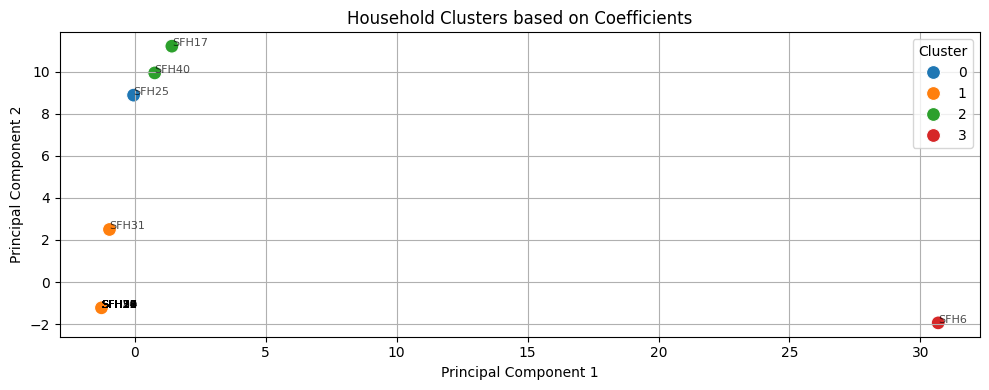

In [52]:
plot_clusters(ya_scaled,ya_coeffs_wide)

In [53]:
yb_coeffs_wide.head()

,household,Intercept_yb_0,Intercept_yb_1,Intercept_yb_10,Intercept_yb_11,Intercept_yb_12,Intercept_yb_13,Intercept_yb_14,Intercept_yb_15,Intercept_yb_16,Intercept_yb_17,Intercept_yb_18,Intercept_yb_19,Intercept_yb_2,Intercept_yb_20,Intercept_yb_21,Intercept_yb_22,Intercept_yb_23,Intercept_yb_3,Intercept_yb_4,Intercept_yb_5,Intercept_yb_6,Intercept_yb_7,Intercept_yb_8,Intercept_yb_9,season_sin_yb_0,season_sin_yb_1,season_sin_yb_10,season_sin_yb_11,season_sin_yb_12,season_sin_yb_13,season_sin_yb_14,season_sin_yb_15,season_sin_yb_16,season_sin_yb_17,season_sin_yb_18,season_sin_yb_19,season_sin_yb_2,season_sin_yb_20,season_sin_yb_21,season_sin_yb_22,season_sin_yb_23,season_sin_yb_3,season_sin_yb_4,season_sin_yb_5,season_sin_yb_6,season_sin_yb_7,season_sin_yb_8,season_sin_yb_9
0,SFH10,526.795963,453.968745,736.378193,750.564697,762.483077,725.528322,728.671536,746.231921,803.834164,849.768631,778.428739,731.125579,400.157732,688.262084,687.930666,658.113702,596.941752,375.187367,440.108470,450.761634,414.312834,474.712171,569.395177,683.260968,-27.244900,-31.997536,104.316182,132.776886,132.513134,107.872451,101.397797,140.563972,61.375148,-125.412449,-102.579763,-140.621944,-21.184057,-64.635632,-61.734179,-68.304934,-48.731601,-3.914895,74.400704,-17.746599,-18.713573,50.038387,99.351978,105.231024
1,SFH11,176.503791,174.933997,348.591819,414.858481,532.164969,532.605851,485.348698,432.365248,457.212501,511.095440,520.660784,476.282053,175.797583,408.729986,336.024819,223.615278,184.265798,175.116427,273.679761,371.053130,324.981231,257.437119,316.852506,357.834070,-6.737377,5.697946,-47.546195,69.094181,-49.071931,-87.425297,-74.236445,-97.857111,-151.853666,-191.972877,-168.567514,-130.961573,0.818433,-130.480496,-99.490512,-51.298444,-14.253937,5.485175,73.933724,-77.709013,-102.399989,-18.092912,-13.503944,-9.261908
2,SFH12,135.583190,130.970866,580.140531,554.729714,537.731220,478.949290,397.108581,460.000403,492.761134,501.105668,444.448560,348.144086,130.115185,294.289105,243.251662,189.159736,150.813806,133.751313,150.199927,164.036622,223.358539,338.026776,400.163193,456.953085,-11.278193,-7.574614,-85.793809,-105.906480,-164.627642,-144.376301,-67.972713,-40.678903,-40.002016,-79.661507,-61.060124,-52.341614,-6.515323,-36.376805,-58.713129,-50.952773,-25.111714,-6.008688,2.961847,-4.789186,57.479217,83.842773,5.237777,-45.177577
3,SFH14,169.354478,158.972286,280.615156,315.801425,321.378618,296.139918,282.179527,295.359621,310.625102,364.660235,426.610495,456.696499,157.436084,461.969148,417.500008,323.357234,214.903751,155.966214,150.793150,154.833444,203.145292,255.309674,247.603042,248.271215,-98.834039,-84.453379,-158.430689,-162.858553,-184.973398,-182.550429,-183.971114,-234.116593,-259.001299,-293.185534,-341.338760,-321.374699,-81.820396,-249.368182,-214.422923,-205.782002,-153.385124,-87.284669,-96.895060,-107.736714,-98.276283,-102.458858,-158.289705,-150.609322
4,SFH16,103.378925,100.763723,257.852967,362.173042,381.767807,360.103164,324.852222,309.286716,316.959419,324.893880,352.445536,357.947937,99.728399,299.697625,200.460356,141.024637,115.941555,105.499770,169.193898,210.692036,244.316614,258.338044,242.934411,240.168542,-27.761481,-25.250082,-59.560349,-23.557668,-150.341023,-151.457287,-146.276795,-90.559063,-69.002579,-114.354356,-125.583626,-113.477767,-24.172966,-131.011474,-93.004779,-55.690165,-38.917819,-19.071112,0.062562,-68.557650,1.689984,-17.641319,-50.677334,-69.246210


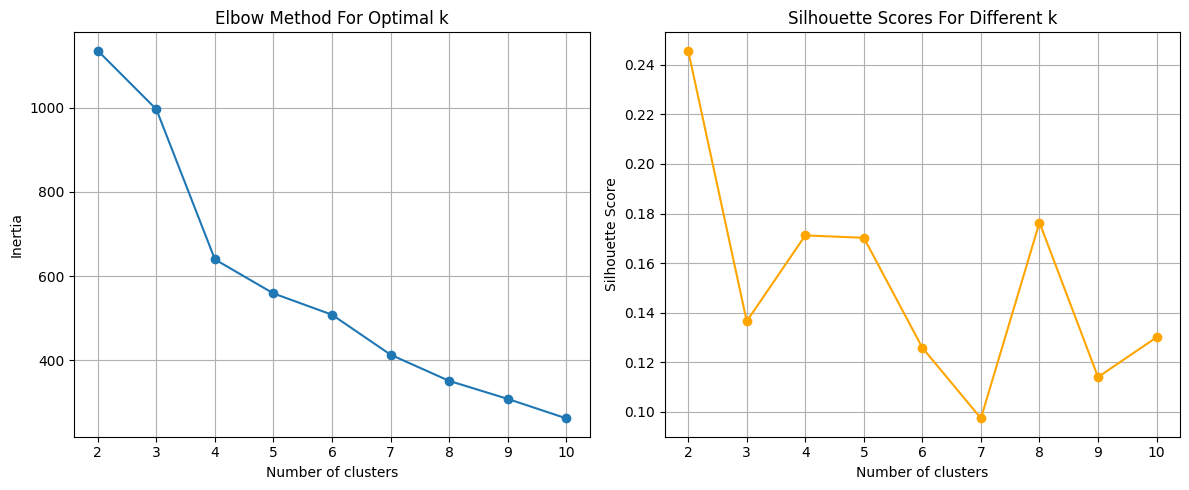

In [54]:
## for yb's
yb_scaled, scaler_yb = data_scale(yb_coeffs_wide)
elbow_silhouette(yb_scaled)

In [55]:
# for yb's clustering

optimal_k = 2

kmeans_b = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
#kmeans_b.fit(yb_scaled)
#yb_coeffs_wide['cluster'] = kmeans_b.predict(yb_scaled)
yb_coeffs_wide['cluster'] = kmeans_b.fit_predict(yb_scaled)
# Preview results
print(yb_coeffs_wide[['household', 'cluster']].head())

  household  cluster
0     SFH10        0
1     SFH11        1
2     SFH12        1
3     SFH14        1
4     SFH16        1


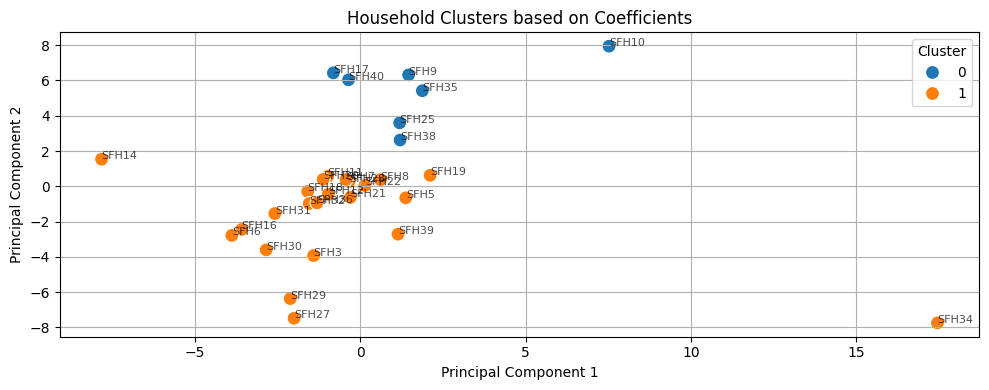

In [56]:
plot_clusters(yb_scaled,yb_coeffs_wide)

In [57]:
# classify the remaining household

In [58]:
household_3 = og_df[~og_df['household'].isin(random_30)].reset_index(drop=True)

In [59]:
household_3_nonas = household_3.dropna()

In [60]:
household_3_results_df_b_02 , household_3_coeffs_df_b_02 = ols_model(household_3_nonas, yb_targets)
household_3_results_df_a_02 , household_3_coeffs_df_a_02 = ols_model(household_3_nonas, ya_targets)
household_3_yb_coeffs_wide = wide_df(household_3_coeffs_df_b_02)
household_3_ya_coeffs_wide = wide_df(household_3_coeffs_df_a_02)

In [61]:
# Assuming `scaler` was used before
household_3_ya_coeffs_wide_1 = household_3_ya_coeffs_wide.drop('household',axis=1)
new_data_scaled_a = scaler_a.transform(household_3_ya_coeffs_wide_1) 

In [62]:
# Assuming `scaler` was used before
household_3_yb_coeffs_wide_1 = household_3_yb_coeffs_wide.drop('household',axis=1)
new_data_scaled_b = scaler_yb.transform(household_3_yb_coeffs_wide_1) 

In [63]:
new_clusters_a = kmeans_a.predict(new_data_scaled_a)
household_3_ya_coeffs_wide['cluster'] = new_clusters_a

In [64]:
new_clusters_b = kmeans_b.predict(new_data_scaled_b)
household_3_yb_coeffs_wide['cluster'] = new_clusters_b

In [65]:
household_3_yb_coeffs_wide[['household','cluster']]

,household,cluster
0,SFH23,1
1,SFH37,1
2,SFH4,1


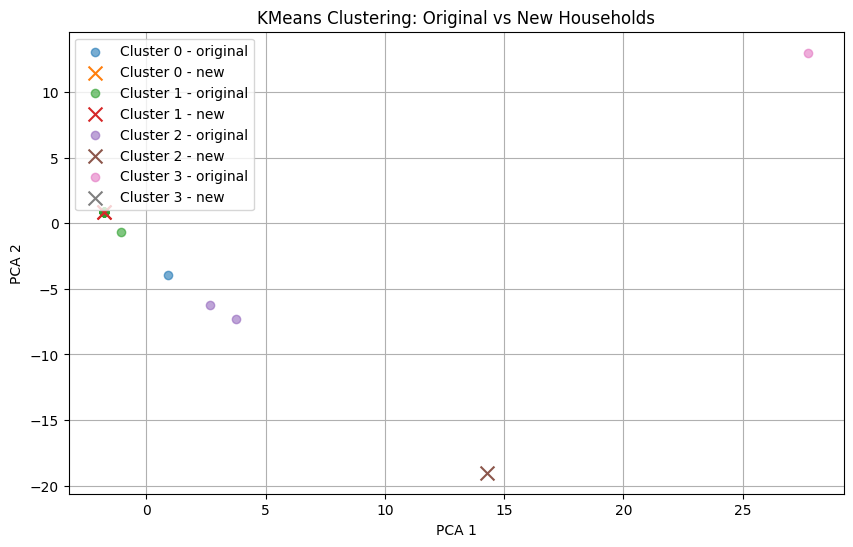

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine original and new data
combined_data = np.vstack([ya_scaled, new_data_scaled_a])
combined_labels = np.concatenate([kmeans_a.labels_, new_clusters_a])
combined_source = ['original'] * len(ya_scaled) + ['new'] * len(new_data_scaled_a)

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_data)

# Plot
plt.figure(figsize=(10, 6))
for label in np.unique(combined_labels):
    idx = (combined_labels == label)
    original_idx = (np.array(combined_source) == 'original') & idx
    new_idx = (np.array(combined_source) == 'new') & idx
    plt.scatter(reduced[original_idx, 0], reduced[original_idx, 1], label=f'Cluster {label} - original', alpha=0.6)
    plt.scatter(reduced[new_idx, 0], reduced[new_idx, 1], label=f'Cluster {label} - new', marker='x', s=100)

plt.legend()
plt.title('KMeans Clustering: Original vs New Households')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


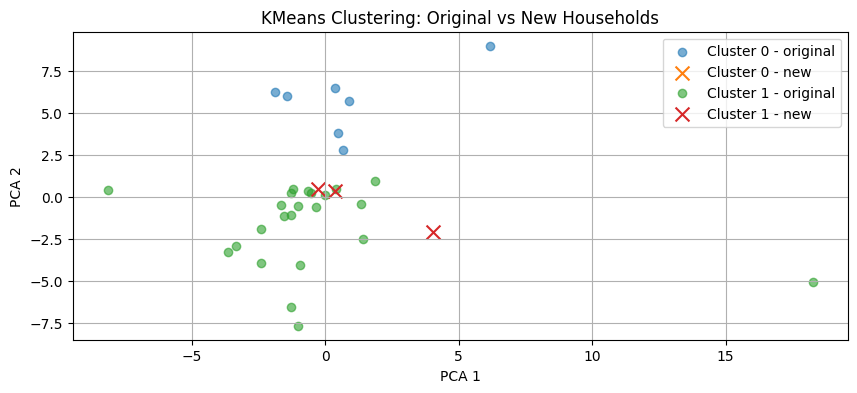

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine original and new data
combined_data = np.vstack([yb_scaled, new_data_scaled_b])
combined_labels = np.concatenate([kmeans_b.labels_, new_clusters_b])
combined_source = ['original'] * len(yb_scaled) + ['new'] * len(new_data_scaled_b)

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_data)

# Plot
plt.figure(figsize=(10, 4))
for label in np.unique(combined_labels):
    idx = (combined_labels == label)
    original_idx = (np.array(combined_source) == 'original') & idx
    new_idx = (np.array(combined_source) == 'new') & idx
    plt.scatter(reduced[original_idx, 0], reduced[original_idx, 1], label=f'Cluster {label} - original', alpha=0.6)
    plt.scatter(reduced[new_idx, 0], reduced[new_idx, 1], label=f'Cluster {label} - new', marker='x', s=100)

plt.legend()
plt.title('KMeans Clustering: Original vs New Households')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [68]:
household_3_ya_coeffs_wide.shape

(3, 50)

In [69]:
## Check whether you should do the clustering for each weekday separately.  In my case is weeknd and non weeknd

In [64]:
results_df_b_02 , coeffs_df_b_02 = ols_model(df, yb_targets)

In [65]:
## clustering for weekdays and weeknd separately

In [70]:
df = new_df[['date', 
       'yb_0', 'yb_1', 'yb_2', 'yb_3', 'yb_4', 'yb_5', 'yb_6', 'yb_7', 'yb_8',
       'yb_9', 'yb_10', 'yb_11', 'yb_12', 'yb_13', 'yb_14', 'yb_15', 'yb_16',
       'yb_17', 'yb_18', 'yb_19', 'yb_20', 'yb_21', 'yb_22', 'yb_23',
       'household', 'day_of_week', 'day_of_year', 'shifted_day', 'season_sin',
       'is_weekend']]

In [71]:
df_noweekend = df[df['is_weekend']==0].drop('is_weekend',axis=1)
df_weekend = df[df['is_weekend']==1].drop('is_weekend',axis=1)

In [72]:
results_df_now , coeffs_df_now = ols_model(df_noweekend, yb_targets)
results_df_w , coeffs_df_w = ols_model(df_weekend, yb_targets)

In [73]:
yb_coeffs_now = wide_df(coeffs_df_now)
yb_coeffs_w = wide_df(coeffs_df_w)

In [74]:
yb_coeffs_w.columns 

Index(['household', 'Intercept_yb_0', 'Intercept_yb_1', 'Intercept_yb_10',
       'Intercept_yb_11', 'Intercept_yb_12', 'Intercept_yb_13',
       'Intercept_yb_14', 'Intercept_yb_15', 'Intercept_yb_16',
       'Intercept_yb_17', 'Intercept_yb_18', 'Intercept_yb_19',
       'Intercept_yb_2', 'Intercept_yb_20', 'Intercept_yb_21',
       'Intercept_yb_22', 'Intercept_yb_23', 'Intercept_yb_3',
       'Intercept_yb_4', 'Intercept_yb_5', 'Intercept_yb_6', 'Intercept_yb_7',
       'Intercept_yb_8', 'Intercept_yb_9', 'season_sin_yb_0',
       'season_sin_yb_1', 'season_sin_yb_10', 'season_sin_yb_11',
       'season_sin_yb_12', 'season_sin_yb_13', 'season_sin_yb_14',
       'season_sin_yb_15', 'season_sin_yb_16', 'season_sin_yb_17',
       'season_sin_yb_18', 'season_sin_yb_19', 'season_sin_yb_2',
       'season_sin_yb_20', 'season_sin_yb_21', 'season_sin_yb_22',
       'season_sin_yb_23', 'season_sin_yb_3', 'season_sin_yb_4',
       'season_sin_yb_5', 'season_sin_yb_6', 'season_sin_yb_7',
    

In [75]:
yb_scaled_now, scaler_now = data_scale(yb_coeffs_now)
yb_scaled_w, scaler_w = data_scale(yb_coeffs_w)

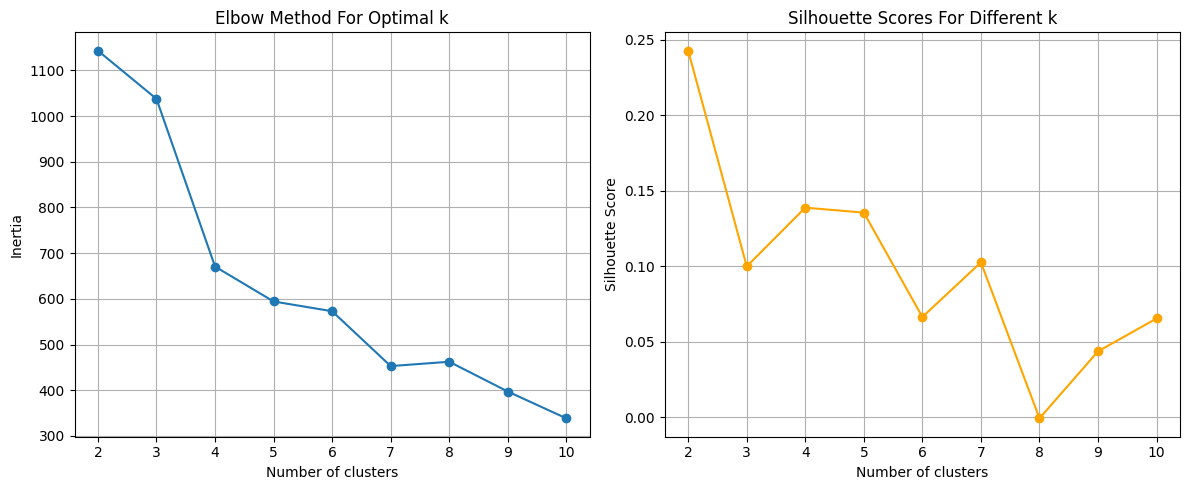

In [76]:
elbow_silhouette(yb_scaled_now)

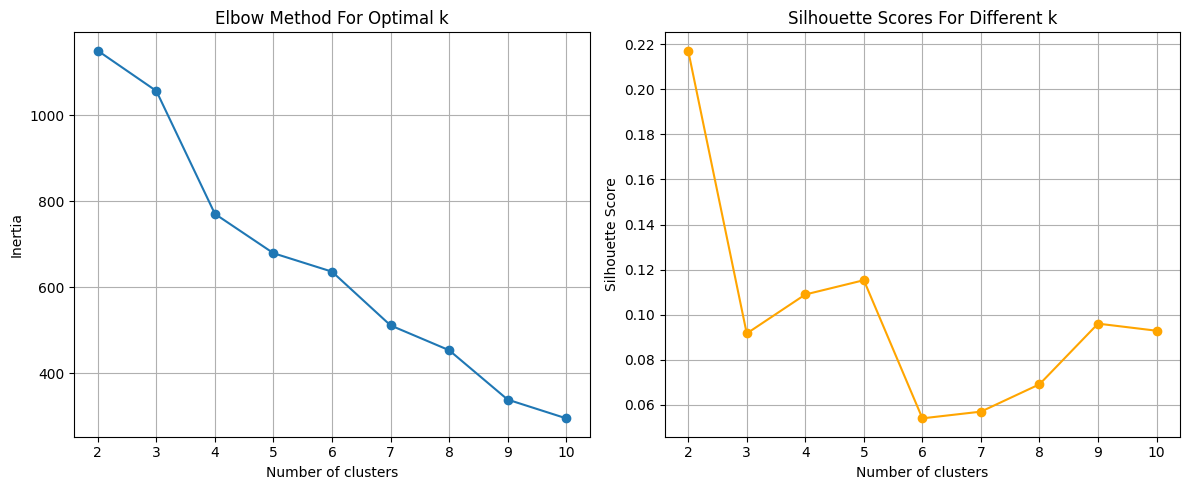

In [77]:
elbow_silhouette(yb_scaled_w)

In [78]:
# for yb's clustering

optimal_k = 2
kmeans_b_now = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
#kmeans_b.fit(yb_scaled)
#yb_coeffs_wide['cluster'] = kmeans_b.predict(yb_scaled)
yb_coeffs_now['cluster'] = kmeans_b_now.fit_predict(yb_scaled_now)
# Preview results
print(yb_coeffs_now[['household', 'cluster']].head())

  household  cluster
0     SFH10        0
1     SFH11        1
2     SFH12        1
3     SFH14        1
4     SFH16        1


In [79]:
# for yb's clustering

optimal_k = 2
kmeans_b_w = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
#kmeans_b.fit(yb_scaled)
#yb_coeffs_wide['cluster'] = kmeans_b.predict(yb_scaled)
yb_coeffs_w['cluster'] = kmeans_b_w.fit_predict(yb_scaled_w)
# Preview results
print(yb_coeffs_w[['household', 'cluster']].head())

  household  cluster
0     SFH10        0
1     SFH11        1
2     SFH12        1
3     SFH14        1
4     SFH16        1


In [76]:
yb_coeffs_now['cluster']-yb_coeffs_w['cluster']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19   -1
20    0
21    0
22   -1
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: cluster, dtype: int32

In [77]:
## classify the remaining 3 houses for weekdays and non-week days

In [80]:
household_3_w = household_3[household_3['is_weekend']==1].drop('is_weekend',axis=1)
household_3_now = household_3[household_3['is_weekend']==0].drop('is_weekend',axis=1)

In [81]:
household_3_results_df_now , household_3coeffs_df_now = ols_model(household_3_w, yb_targets)
household_3_results_df_w , household_3coeffs_df_w = ols_model(household_3_now, yb_targets)

In [82]:
household_3_yb_coeffs_wide_now = wide_df(household_3coeffs_df_now)
household_3_yb_coeffs_wide_w = wide_df(household_3coeffs_df_w)

In [83]:
household_3_yb_coeffs_wide_now

,household,Intercept_yb_0,Intercept_yb_1,Intercept_yb_10,Intercept_yb_11,Intercept_yb_12,Intercept_yb_13,Intercept_yb_14,Intercept_yb_15,Intercept_yb_16,Intercept_yb_17,Intercept_yb_18,Intercept_yb_19,Intercept_yb_2,Intercept_yb_20,Intercept_yb_21,Intercept_yb_22,Intercept_yb_23,Intercept_yb_3,Intercept_yb_4,Intercept_yb_5,Intercept_yb_6,Intercept_yb_7,Intercept_yb_8,Intercept_yb_9,season_sin_yb_0,season_sin_yb_1,season_sin_yb_10,season_sin_yb_11,season_sin_yb_12,season_sin_yb_13,season_sin_yb_14,season_sin_yb_15,season_sin_yb_16,season_sin_yb_17,season_sin_yb_18,season_sin_yb_19,season_sin_yb_2,season_sin_yb_20,season_sin_yb_21,season_sin_yb_22,season_sin_yb_23,season_sin_yb_3,season_sin_yb_4,season_sin_yb_5,season_sin_yb_6,season_sin_yb_7,season_sin_yb_8,season_sin_yb_9
0,SFH23,284.692706,254.825304,391.763401,409.417027,373.867567,362.194057,331.008796,299.508558,381.319177,564.193685,564.324217,490.360559,248.740092,374.013670,361.385069,364.023412,319.255289,245.379995,247.099142,240.949998,237.895390,301.185463,371.125317,378.990227,-3.973208,2.752080,-11.848855,-82.286593,-90.586150,-62.992918,-97.301249,-59.671375,-15.331108,-81.559548,-167.613223,-56.851319,9.322178,-28.554925,-19.640105,-33.229970,-31.411977,9.917380,8.148753,-1.322999,-4.165204,50.891745,-9.635862,-34.482509
1,SFH37,224.756073,219.834545,380.090938,443.964174,432.952420,425.700026,403.075514,379.059154,438.565478,426.780865,465.716668,366.555536,217.589512,320.933934,281.526127,261.586041,244.076738,217.009938,221.512518,245.746408,267.154899,327.536824,325.096970,318.686146,16.277105,10.849855,40.910176,108.269008,85.877919,123.517217,131.992786,101.773909,172.168361,113.593973,43.357590,16.408271,6.622942,62.804697,51.545493,43.693563,34.807641,7.830750,-4.003093,-31.216385,9.644171,40.461100,28.149991,50.885327
2,SFH4,237.588289,237.418938,430.920792,397.101103,347.608576,367.414756,353.387433,347.176087,385.535284,413.636283,413.794079,371.707366,244.196852,346.743989,323.448159,275.429393,245.223095,257.102823,266.995782,271.124686,303.489105,353.282961,377.257053,412.758458,-16.225644,-24.062683,-44.067169,-147.157502,-96.667494,-86.561576,-80.526728,-18.616709,-71.996812,-111.435444,-104.380028,-61.398581,-23.713542,-50.019177,-55.474466,-51.746760,-27.285740,-20.861945,-11.998213,1.074027,10.451732,12.161505,-3.013512,-30.165904


In [84]:
household_3_coeffs_wide_now = household_3_yb_coeffs_wide_now.drop('household',axis=1)
household_3_coeffs_wide_w   = household_3_yb_coeffs_wide_w.drop('household',axis=1)
household_3_new_data_scaled_now = scaler_now.transform(household_3_coeffs_wide_now ) 
household_3_new_data_scaled_w = scaler_w.transform(household_3_coeffs_wide_w) 

In [85]:
new_clusters_now = kmeans_b_now.predict(household_3_new_data_scaled_now)
new_clusters_w = kmeans_b_w.predict(household_3_new_data_scaled_w)
household_3_yb_coeffs_wide_now['cluster'] = new_clusters_now
household_3_yb_coeffs_wide_w['cluster'] = new_clusters_w

In [86]:
household_3_yb_coeffs_wide_now['cluster']-household_3_yb_coeffs_wide_w['cluster']

0    0
1    0
2    0
Name: cluster, dtype: int32

In [87]:
yb_coeffs_now.columns

Index(['household', 'Intercept_yb_0', 'Intercept_yb_1', 'Intercept_yb_10',
       'Intercept_yb_11', 'Intercept_yb_12', 'Intercept_yb_13',
       'Intercept_yb_14', 'Intercept_yb_15', 'Intercept_yb_16',
       'Intercept_yb_17', 'Intercept_yb_18', 'Intercept_yb_19',
       'Intercept_yb_2', 'Intercept_yb_20', 'Intercept_yb_21',
       'Intercept_yb_22', 'Intercept_yb_23', 'Intercept_yb_3',
       'Intercept_yb_4', 'Intercept_yb_5', 'Intercept_yb_6', 'Intercept_yb_7',
       'Intercept_yb_8', 'Intercept_yb_9', 'season_sin_yb_0',
       'season_sin_yb_1', 'season_sin_yb_10', 'season_sin_yb_11',
       'season_sin_yb_12', 'season_sin_yb_13', 'season_sin_yb_14',
       'season_sin_yb_15', 'season_sin_yb_16', 'season_sin_yb_17',
       'season_sin_yb_18', 'season_sin_yb_19', 'season_sin_yb_2',
       'season_sin_yb_20', 'season_sin_yb_21', 'season_sin_yb_22',
       'season_sin_yb_23', 'season_sin_yb_3', 'season_sin_yb_4',
       'season_sin_yb_5', 'season_sin_yb_6', 'season_sin_yb_7',
    

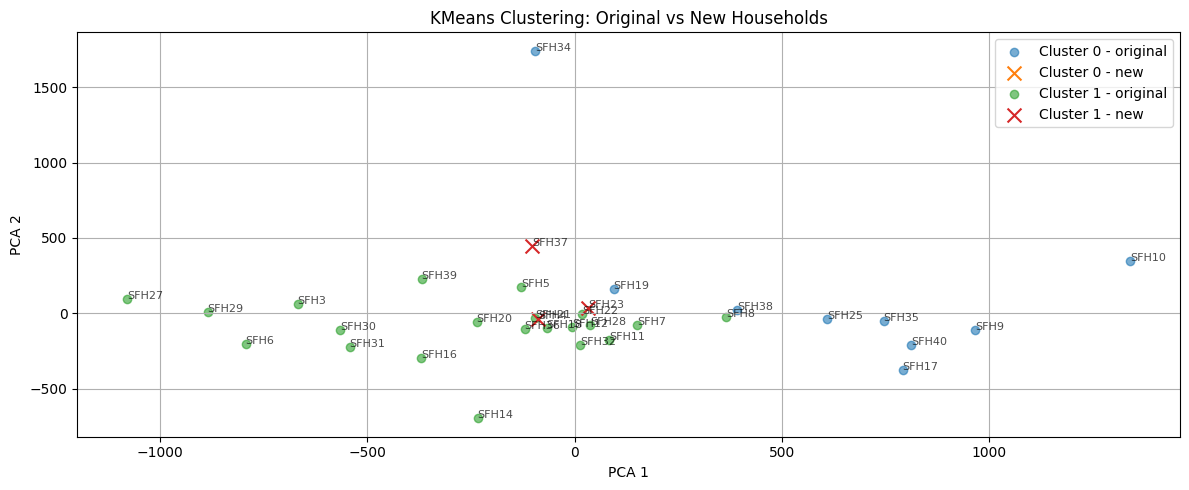

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
combined_data = np.vstack([yb_coeffs_now,household_3_yb_coeffs_wide_now])
# 1. Split components
household_ids = combined_data[:, 0]                            # Household names (strings)
numerical_features = combined_data[:, 1:-1].astype(float)      # Features for PCA
combined_labels = combined_data[:, -1].astype(int)             # Cluster labels (ints)

# 2. Define source labels (original/new)
combined_source = ['original'] * len(yb_coeffs_now) + ['new'] * len(household_3_new_data_scaled_now)

# 3. Apply PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(numerical_features)

# 4. Plot
plt.figure(figsize=(12, 5))

for label in np.unique(combined_labels):
    idx = combined_labels == label
    original_idx = np.array(combined_source) == 'original'
    new_idx = np.array(combined_source) == 'new'

    # Plot original households
    plt.scatter(reduced[idx & original_idx, 0], reduced[idx & original_idx, 1],
                label=f'Cluster {label} - original', alpha=0.6)

    # Plot new households
    plt.scatter(reduced[idx & new_idx, 0], reduced[idx & new_idx, 1],
                label=f'Cluster {label} - new', marker='x', s=100)

# 5. Annotate each point with household name
for i, txt in enumerate(household_ids):
    plt.annotate(txt, (reduced[i, 0], reduced[i, 1]), fontsize=8, alpha=0.7)

# 6. Finalize plot
plt.legend()
plt.title('KMeans Clustering: Original vs New Households')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


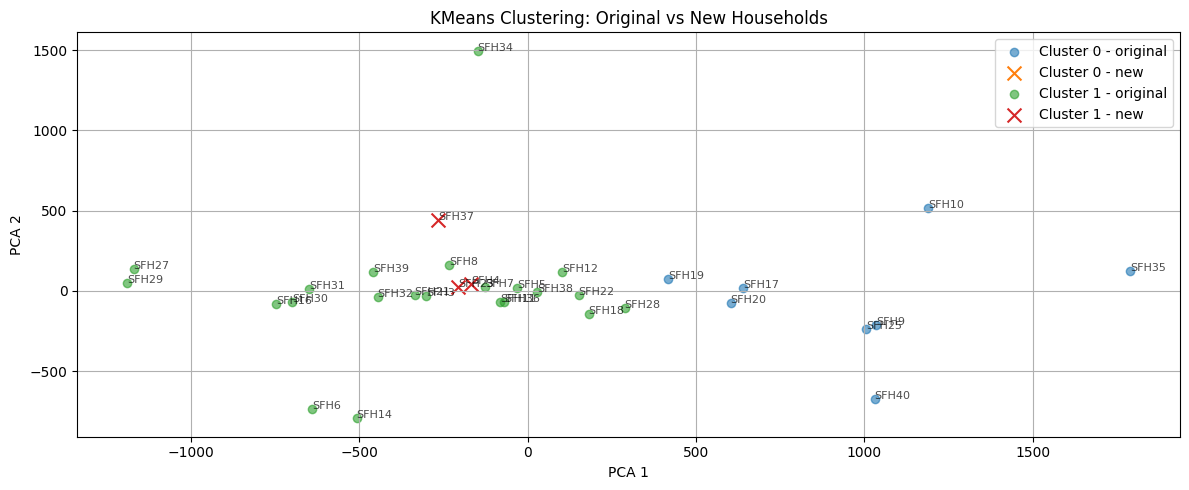

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
combined_data = np.vstack([yb_coeffs_w,household_3_yb_coeffs_wide_w])
# 1. Split components
household_ids = combined_data[:, 0]                            # Household names (strings)
numerical_features = combined_data[:, 1:-1].astype(float)      # Features for PCA
combined_labels = combined_data[:, -1].astype(int)             # Cluster labels (ints)

# 2. Define source labels (original/new)
combined_source = ['original'] * len(yb_coeffs_w) + ['new'] * len(household_3_yb_coeffs_wide_w)

# 3. Apply PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(numerical_features)

# 4. Plot
plt.figure(figsize=(12, 5))

for label in np.unique(combined_labels):
    idx = combined_labels == label
    original_idx = np.array(combined_source) == 'original'
    new_idx = np.array(combined_source) == 'new'

    # Plot original households
    plt.scatter(reduced[idx & original_idx, 0], reduced[idx & original_idx, 1],
                label=f'Cluster {label} - original', alpha=0.6)

    # Plot new households
    plt.scatter(reduced[idx & new_idx, 0], reduced[idx & new_idx, 1],
                label=f'Cluster {label} - new', marker='x', s=100)

# 5. Annotate each point with household name
for i, txt in enumerate(household_ids):
    plt.annotate(txt, (reduced[i, 0], reduced[i, 1]), fontsize=8, alpha=0.7)

# 6. Finalize plot
plt.legend()
plt.title('KMeans Clustering: Original vs New Households')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
yb_coeffs_w.columns

Index(['household', 'Intercept_yb_0', 'Intercept_yb_1', 'Intercept_yb_10',
       'Intercept_yb_11', 'Intercept_yb_12', 'Intercept_yb_13',
       'Intercept_yb_14', 'Intercept_yb_15', 'Intercept_yb_16',
       'Intercept_yb_17', 'Intercept_yb_18', 'Intercept_yb_19',
       'Intercept_yb_2', 'Intercept_yb_20', 'Intercept_yb_21',
       'Intercept_yb_22', 'Intercept_yb_23', 'Intercept_yb_3',
       'Intercept_yb_4', 'Intercept_yb_5', 'Intercept_yb_6', 'Intercept_yb_7',
       'Intercept_yb_8', 'Intercept_yb_9', 'season_sin_yb_0',
       'season_sin_yb_1', 'season_sin_yb_10', 'season_sin_yb_11',
       'season_sin_yb_12', 'season_sin_yb_13', 'season_sin_yb_14',
       'season_sin_yb_15', 'season_sin_yb_16', 'season_sin_yb_17',
       'season_sin_yb_18', 'season_sin_yb_19', 'season_sin_yb_2',
       'season_sin_yb_20', 'season_sin_yb_21', 'season_sin_yb_22',
       'season_sin_yb_23', 'season_sin_yb_3', 'season_sin_yb_4',
       'season_sin_yb_5', 'season_sin_yb_6', 'season_sin_yb_7',
    

In [91]:
df.columns

Index(['date', 'yb_0', 'yb_1', 'yb_2', 'yb_3', 'yb_4', 'yb_5', 'yb_6', 'yb_7',
       'yb_8', 'yb_9', 'yb_10', 'yb_11', 'yb_12', 'yb_13', 'yb_14', 'yb_15',
       'yb_16', 'yb_17', 'yb_18', 'yb_19', 'yb_20', 'yb_21', 'yb_22', 'yb_23',
       'household', 'day_of_week', 'day_of_year', 'shifted_day', 'season_sin',
       'is_weekend'],
      dtype='object')

In [92]:
## Mean Load Profile for week days

In [95]:
#df_noweekend
#df_weekend

In [194]:
merged_df_wd = pd.merge(
    yb_coeffs_w,
    df_noweekend[['household', 'season_sin', 'day_of_year']],  # Select only the columns we need from df
    on='household',
    how='inner'  # Use 'inner' to keep only matching households
)


In [113]:
#merged_df_w

In [195]:
yb_coeffs_w

,household,Intercept_yb_0,Intercept_yb_1,Intercept_yb_10,Intercept_yb_11,Intercept_yb_12,Intercept_yb_13,Intercept_yb_14,Intercept_yb_15,Intercept_yb_16,Intercept_yb_17,Intercept_yb_18,Intercept_yb_19,Intercept_yb_2,Intercept_yb_20,Intercept_yb_21,Intercept_yb_22,Intercept_yb_23,Intercept_yb_3,Intercept_yb_4,Intercept_yb_5,Intercept_yb_6,Intercept_yb_7,Intercept_yb_8,Intercept_yb_9,season_sin_yb_0,season_sin_yb_1,season_sin_yb_10,season_sin_yb_11,season_sin_yb_12,season_sin_yb_13,season_sin_yb_14,season_sin_yb_15,season_sin_yb_16,season_sin_yb_17,season_sin_yb_18,season_sin_yb_19,season_sin_yb_2,season_sin_yb_20,season_sin_yb_21,season_sin_yb_22,season_sin_yb_23,season_sin_yb_3,season_sin_yb_4,season_sin_yb_5,season_sin_yb_6,season_sin_yb_7,season_sin_yb_8,season_sin_yb_9,cluster
0,SFH10,532.161671,446.215121,737.773789,746.592996,882.118646,766.283604,763.285802,792.230206,838.846819,876.390052,807.565933,744.829031,401.094889,705.874356,699.346815,658.172042,574.034617,378.049264,383.147458,374.477155,415.175732,565.922195,639.248716,743.962320,-56.727702,-58.595352,134.156415,102.002657,147.189765,74.533876,58.984077,202.994055,93.395852,-155.228005,-106.583143,-47.091869,-30.663296,-49.011921,-47.759248,-57.861051,-44.804517,-6.731966,8.734286,3.553071,26.757434,150.753078,150.438867,104.049615,0
1,SFH11,177.793733,174.659641,571.886508,475.032173,441.868129,398.926996,366.414368,337.842957,373.002074,479.768403,498.538825,472.447731,177.958247,428.552654,360.744750,228.583642,177.946017,176.012279,190.787489,201.366824,211.042109,307.246556,531.392544,657.248992,-7.066050,8.617346,-141.982004,-99.815722,-152.666120,-80.633524,-99.202581,-79.693211,-125.467656,-135.690860,-127.121368,-86.054968,4.786799,-88.818921,-76.570396,-55.851128,3.179828,9.631498,18.809880,13.348093,18.970582,53.013716,-30.485112,-47.610935,1
2,SFH12,138.691013,131.198243,654.542896,661.848314,654.853519,610.003540,459.432858,442.481149,515.429573,530.103784,492.541791,358.927216,129.140074,290.923269,236.017593,199.303112,161.579336,130.694050,132.184881,144.193258,213.109213,342.851083,395.551978,555.781450,-12.008328,-7.396778,85.797468,7.553878,-204.061042,-164.203741,-102.741339,-123.512600,-42.290435,-52.350353,-79.748355,-58.951932,-4.892725,-39.154384,-48.589166,-58.733452,-36.900338,-8.201716,-7.039930,-7.041133,49.435970,75.404987,44.900592,120.644360,1
3,SFH14,184.342479,163.828122,300.467722,283.738446,277.154475,245.553642,247.454446,274.171961,313.643361,397.929306,454.139861,451.515925,157.053468,457.177148,417.852746,341.894497,236.181318,153.603351,147.314240,148.165283,178.448134,247.307482,286.297818,291.372044,-124.852981,-91.040604,-220.677004,-200.883974,-215.520722,-174.419900,-180.390935,-220.874235,-282.395084,-292.951383,-389.132402,-376.141060,-92.278110,-326.149877,-244.913768,-217.574120,-164.952121,-99.981566,-103.407020,-110.933110,-110.447752,-87.934685,-165.384775,-174.579325,1
4,SFH16,107.179174,101.302668,250.015232,304.048499,250.494400,275.179063,282.548587,275.466784,318.262696,311.013153,290.308964,298.708336,98.814686,285.272171,206.575499,148.897051,124.884726,100.473893,103.909018,119.095325,228.760762,267.020182,260.816397,271.912677,-33.698435,-27.202308,-58.503675,8.020028,-32.711776,-91.248587,-130.604742,-86.606930,-101.326843,-103.114213,-145.682244,-75.203041,-24.488013,-131.746980,-89.097360,-44.849307,-43.088268,-23.339176,-27.193358,3.424775,102.049013,72.541737,-77.355962,-102.784774,1
5,SFH17,257.699441,259.259322,722.962212,628.340330,580.920790,645.651260,814.513794,839.474374,607.688795,453.734744,536.687153,601.534390,256.906689,569.511491,451.709476,333.527150,269.338379,256.739643,257.041533,252.647994,420.116060,648.960460,667.726096,617.843395,-49.302609,-45.461720,-54.658622,-109.263399,22.717729,62.368878,34.700660,-128.081850,-208.564624,-83.328169,-107.521549,-145.412519,-51.161449,-108.260596,-144.652691,-140.717406,-63.944679,-48.174754,-55.121405,-51.056600,193.563616,-156.278736,-

In [196]:
# Step 1: Identify hourly intercept and season columns
intercept_cols = [col for col in merged_df_wd.columns if col.startswith('Intercept_yb_')]
season_cols = [col for col in merged_df_wd.columns if col.startswith('season_sin_yb_')]

# Step 2: Melt both intercept and season data into long format
df_intercept = merged_df_wd.melt(
    id_vars=['household', 'cluster', 'day_of_year', 'season_sin'],
    value_vars=intercept_cols,
    var_name='hour',
    value_name='intercept_value'
)

df_season = merged_df_wd.melt(
    id_vars=['household', 'cluster', 'day_of_year', 'season_sin'],
    value_vars=season_cols,
    var_name='hour',
    value_name='season_value'
)

# Step 3: Extract actual hour number (0–23)
df_intercept['hour'] = df_intercept['hour'].str.extract(r'Intercept_yb_(\d+)').astype(int)
df_season['hour'] = df_season['hour'].str.extract(r'season_sin_yb_(\d+)').astype(int)

# Step 4: Merge on household, cluster, day_of_year, season_sin, and hour
df_combined = pd.merge(
    df_intercept,
    df_season,
    on=['household', 'cluster', 'day_of_year', 'season_sin', 'hour']
)

# Step 5: Apply the formula: predicted load = 1 * intercept + s_D * season
df_combined['mean_load'] = (
    df_combined['intercept_value'] + df_combined['season_sin'] * df_combined['season_value']
)
print(df_combined.head())
# After Step 5 from before, df_combined has household-level predicted_load

# Step 6: Calculate total households per group (day_of_year, cluster, hour)
household_counts = (
    df_combined.groupby(['day_of_year', 'cluster', 'hour'])['household']
    .nunique()
    .reset_index()
    .rename(columns={'household': 'total_households'})
)

# Step 7: Merge household counts back to the df_combined so each row knows total households in its group
result_yb_wd = pd.merge(
    df_combined[['household', 'day_of_year', 'cluster', 'hour', 'mean_load']],
    household_counts,
    on=['day_of_year', 'cluster', 'hour'],
    how='left'
)

  household  cluster  day_of_year  season_sin  hour  intercept_value  \
0     SFH10        0            1   -0.977848     0       532.161671   
1     SFH10        0            2   -0.974100     0       532.161671   
2     SFH10        0            3   -0.970064     0       532.161671   
3     SFH10        0            4   -0.965740     0       532.161671   
4     SFH10        0            7   -0.951057     0       532.161671   

   season_value   mean_load  
0    -56.727702  587.632761  
1    -56.727702  587.420152  
2    -56.727702  587.191168  
3    -56.727702  586.945879  
4    -56.727702  586.112922  


In [193]:
#df_mean_load_weekdays = df_combined.drop('household',axis=1).groupby(['cluster','day_of_year','hour']).mean().reset_index()
#df_combined

In [148]:
#result_yb_w.head()

In [197]:
# Step 1: Melt df to long format so each row is household, day_of_year, hour, actual_load
df_long = df_noweekend.melt(id_vars=['household', 'day_of_year'], 
                  value_vars=[f'yb_{i}' for i in range(24)],
                  var_name='hour',
                  value_name='actual_load')

# Step 2: Extract hour number as integer from 'hour' column (e.g., 'yb_0' -> 0)
df_long['hour'] = df_long['hour'].str.extract(r'yb_(\d+)').astype(int)

# Step 3: Merge df_long with result_yb_w on household, day_of_year, hour
merged_error_df_wd = pd.merge(
    df_long,
    result_yb_wd[['household', 'day_of_year', 'hour', 'mean_load']],
    on=['household', 'day_of_year', 'hour'],
    how='left'
)

# Step 4: Calculate error as sqrt((actual_load - mean_load)^2)
merged_error_df_wd['error'] = np.sqrt((merged_error_df_wd['actual_load'] - merged_error_df_wd['mean_load'])**2)

# Step 5: If you want, merge back the 'cluster' and 'total_households' columns from result_yb_w
merged_error_df_wd = pd.merge(
    merged_error_df_wd,
    result_yb_w[['household', 'day_of_year', 'hour', 'cluster', 'total_households']],
    on=['household', 'day_of_year', 'hour'],
    how='left'
)



In [198]:
merged_error_df_wd.head()

,household,day_of_year,hour,actual_load,mean_load,error,cluster,total_households
0,SFH10,1,0,826.489743,587.632761,238.856983,0,8
1,SFH10,2,0,909.217434,587.420152,321.797282,0,8
2,SFH10,3,0,518.288777,587.191168,68.902391,0,8
3,SFH10,4,0,541.188289,586.945879,45.757590,0,8
4,SFH10,7,0,478.063726,586.112922,108.049196,0,8


In [199]:
merged_error_df_wd['Variance'] = merged_error_df_wd['error']*3

In [200]:

df_mean_load_weekdays = merged_error_df_wd[['day_of_year', 'hour','cluster','actual_load','mean_load', 'error','total_households', 'Variance']].groupby(['cluster','day_of_year','hour']).mean().reset_index()

In [201]:
df_mean_load_weekdays

,cluster,day_of_year,hour,actual_load,mean_load,error,total_households,Variance
0,0,1,0,286.242860,313.641205,87.112591,8.0,261.337772
1,0,1,1,285.353874,264.831513,59.185306,8.0,177.555917
2,0,1,2,256.228139,242.148431,47.708480,8.0,143.125439
3,0,1,3,211.365799,232.154434,23.259707,8.0,69.779120
4,0,1,4,282.195157,235.765779,63.449216,8.0,190.347647
...,...,...,...,...,...,...,...,...
12523,1,365,19,544.594373,475.492473,142.433974,20.0,427.301921
12524,1,365,20,444.490418,417.044369,133.125413,20.0,399.376239
12525,1,365,21,370.667462,354.913400,93.207146,20.0,279.621439
12526,1,365,22,338.981973,280.816517,77.185597,20.0,231.556790


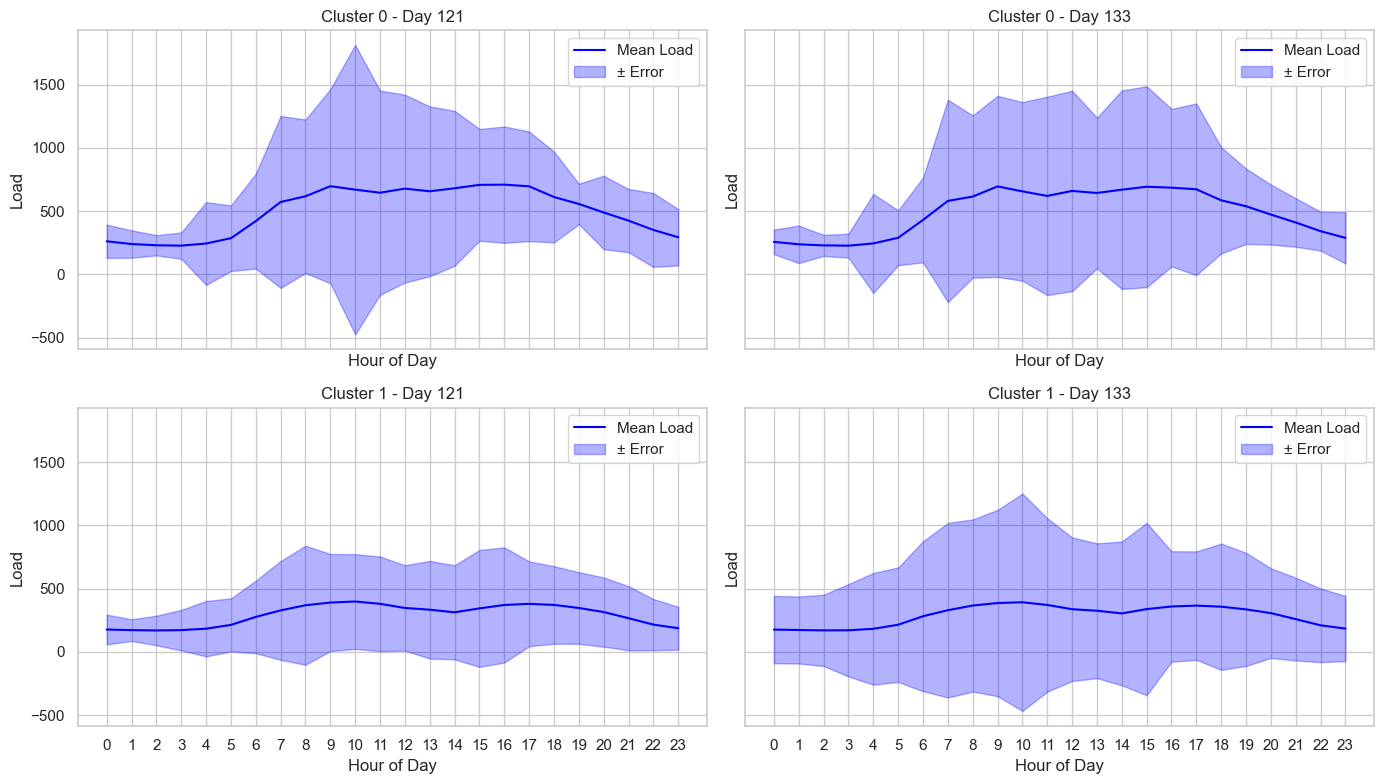

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Randomly select two distinct days
sample_days = df_mean_load_weekdays['day_of_year'].drop_duplicates().sample(2).tolist()
clusters = [0, 1]

# Filter the data for selected days and clusters
plot_df = df_mean_load_weekdays[df_mean_load_weekdays['day_of_year'].isin(sample_days) & df_mean_load_weekdays['cluster'].isin(clusters)]

sns.set(style='whitegrid')

fig, axs = plt.subplots(len(clusters), len(sample_days), figsize=(14, 8), sharex=True, sharey=True)

for i, cluster in enumerate(clusters):
    for j, day in enumerate(sample_days):
        ax = axs[i, j]
        data = plot_df[(plot_df['cluster'] == cluster) & (plot_df['day_of_year'] == day)]
        
        if data.empty:
            ax.set_title(f'Cluster {cluster} - Day {day} (No Data)')
            continue

        hours = data['hour']
        mean_load = data['mean_load']
        error = data['Variance']

        ax.plot(hours, mean_load, label='Mean Load', color='blue')
        ax.fill_between(hours, mean_load - error, mean_load + error, alpha=0.3, color='blue', label='± Error')

        ax.set_title(f'Cluster {cluster} - Day {day}')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Load')
        ax.set_xticks(range(0, 24))
        ax.legend()

plt.tight_layout()
plt.show()


In [131]:
#merged_error_df[merged_error_df['cluster']==0].to_csv('sample_load_profile.csv')

In [168]:
# 'SFH10' belongs to cluster 0

In [170]:
df_mean_load_weekdays.columns

Index(['cluster', 'day_of_year', 'hour', 'actual_load', 'mean_load', 'error',
       'total_households', 'Variance'],
      dtype='object')

In [169]:
df_noweekend.columns

Index(['date', 'yb_0', 'yb_1', 'yb_2', 'yb_3', 'yb_4', 'yb_5', 'yb_6', 'yb_7',
       'yb_8', 'yb_9', 'yb_10', 'yb_11', 'yb_12', 'yb_13', 'yb_14', 'yb_15',
       'yb_16', 'yb_17', 'yb_18', 'yb_19', 'yb_20', 'yb_21', 'yb_22', 'yb_23',
       'household', 'day_of_week', 'day_of_year', 'shifted_day', 'season_sin'],
      dtype='object')

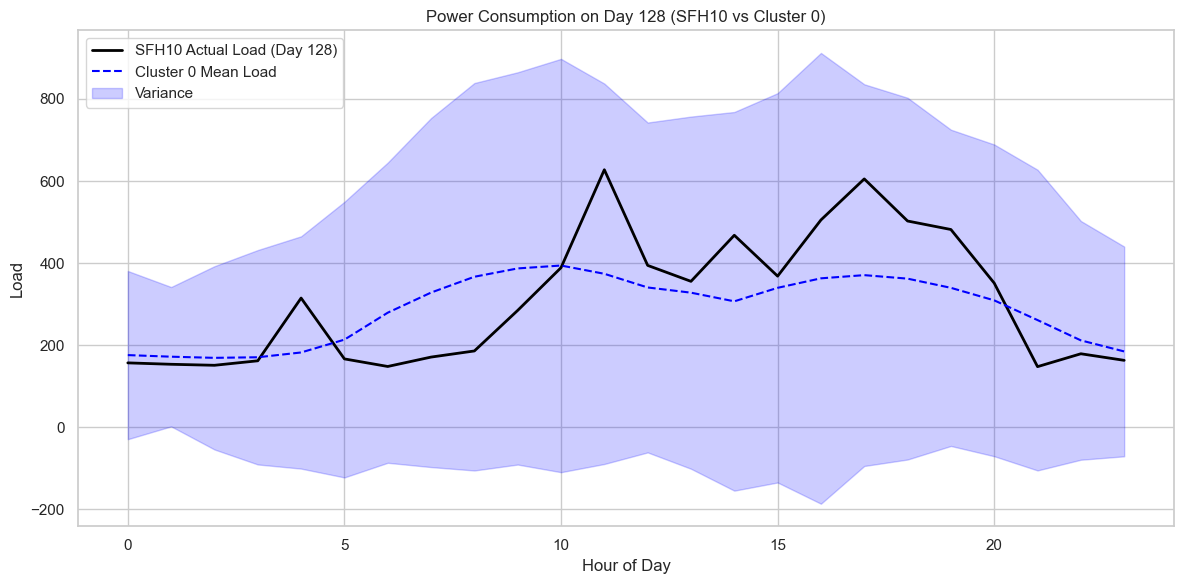

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Select a random day for SFH10
sfh10_data = df_noweekend[df_noweekend['household'] == 'SFH28']
random_day = np.random.choice(sfh10_data['day_of_year'].unique())

# 2. Extract actual hourly load for that day
actual_row = sfh10_data[sfh10_data['day_of_year'] == random_day]
actual_load = actual_row[[f'yb_{i}' for i in range(24)]].values.flatten()

# 3. Extract cluster 0's mean load and variance for that day
mean_data = df_mean_load_weekdays[
    (df_mean_load_weekdays['day_of_year'] == random_day) &
    (df_mean_load_weekdays['cluster'] == 1)
].sort_values('hour')

hours = mean_data['hour']
mean_load = mean_data['mean_load']
std_dev =mean_data['Variance']

# 4. Plot
plt.figure(figsize=(12, 6))
plt.plot(hours, actual_load, label=f'SFH10 Actual Load (Day {random_day})', color='black', linewidth=2)
plt.plot(hours, mean_load, label='Cluster 0 Mean Load', color='blue', linestyle='--')
plt.fill_between(hours, mean_load - std_dev, mean_load + std_dev, color='blue', alpha=0.2, label='Variance')

plt.title(f"Power Consumption on Day {random_day} (SFH10 vs Cluster 0)")
plt.xlabel("Hour of Day")
plt.ylabel("Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [183]:
### Weeknds

In [204]:
merged_df_we = pd.merge(
    yb_coeffs_w,
    df_weekend[['household', 'season_sin', 'day_of_year']],  # Select only the columns we need from df
    on='household',
    how='inner'  # Use 'inner' to keep only matching households
)


In [205]:
# Step 1: Identify hourly intercept and season columns
intercept_cols = [col for col in merged_df_we.columns if col.startswith('Intercept_yb_')]
season_cols = [col for col in merged_df_we.columns if col.startswith('season_sin_yb_')]

# Step 2: Melt both intercept and season data into long format
df_intercept = merged_df_we.melt(
    id_vars=['household', 'cluster', 'day_of_year', 'season_sin'],
    value_vars=intercept_cols,
    var_name='hour',
    value_name='intercept_value'
)

df_season = merged_df_we.melt(
    id_vars=['household', 'cluster', 'day_of_year', 'season_sin'],
    value_vars=season_cols,
    var_name='hour',
    value_name='season_value'
)

# Step 3: Extract actual hour number (0–23)
df_intercept['hour'] = df_intercept['hour'].str.extract(r'Intercept_yb_(\d+)').astype(int)
df_season['hour'] = df_season['hour'].str.extract(r'season_sin_yb_(\d+)').astype(int)

# Step 4: Merge on household, cluster, day_of_year, season_sin, and hour
df_combined = pd.merge(
    df_intercept,
    df_season,
    on=['household', 'cluster', 'day_of_year', 'season_sin', 'hour']
)

# Step 5: Apply the formula: predicted load = 1 * intercept + s_D * season
df_combined['mean_load'] = (
    df_combined['intercept_value'] + df_combined['season_sin'] * df_combined['season_value']
)
print(df_combined.head())
# After Step 5 from before, df_combined has household-level predicted_load

# Step 6: Calculate total households per group (day_of_year, cluster, hour)
household_counts = (
    df_combined.groupby(['day_of_year', 'cluster', 'hour'])['household']
    .nunique()
    .reset_index()
    .rename(columns={'household': 'total_households'})
)

# Step 7: Merge household counts back to the df_combined so each row knows total households in its group
result_yb_we = pd.merge(
    df_combined[['household', 'day_of_year', 'cluster', 'hour', 'mean_load']],
    household_counts,
    on=['day_of_year', 'cluster', 'hour'],
    how='left'
)

  household  cluster  day_of_year  season_sin  hour  intercept_value  \
0     SFH10        0            5   -0.961130     0       532.161671   
1     SFH10        0            6   -0.956235     0       532.161671   
2     SFH10        0           12   -0.920971     0       532.161671   
3     SFH10        0           13   -0.914128     0       532.161671   
4     SFH10        0           19   -0.867456     0       532.161671   

   season_value   mean_load  
0    -56.727702  586.684355  
1    -56.727702  586.406675  
2    -56.727702  584.406256  
3    -56.727702  584.018051  
4    -56.727702  581.370477  


In [206]:
# Step 1: Melt df to long format so each row is household, day_of_year, hour, actual_load
df_long = df_weekend.melt(id_vars=['household', 'day_of_year'], 
                  value_vars=[f'yb_{i}' for i in range(24)],
                  var_name='hour',
                  value_name='actual_load')

# Step 2: Extract hour number as integer from 'hour' column (e.g., 'yb_0' -> 0)
df_long['hour'] = df_long['hour'].str.extract(r'yb_(\d+)').astype(int)

# Step 3: Merge df_long with result_yb_w on household, day_of_year, hour
merged_error_df_we = pd.merge(
    df_long,
    result_yb_we[['household', 'day_of_year', 'hour', 'mean_load']],
    on=['household', 'day_of_year', 'hour'],
    how='left'
)

# Step 4: Calculate error as sqrt((actual_load - mean_load)^2)
merged_error_df_we['error'] = np.sqrt((merged_error_df_we['actual_load'] - merged_error_df_we['mean_load'])**2)

# Step 5: If you want, merge back the 'cluster' and 'total_households' columns from result_yb_w
merged_error_df_we = pd.merge(
    merged_error_df_we,
    result_yb_we[['household', 'day_of_year', 'hour', 'cluster', 'total_households']],
    on=['household', 'day_of_year', 'hour'],
    how='left'
)



In [207]:
merged_error_df_we['Variance'] = merged_error_df_we['error']*3

In [208]:

df_mean_load_weekends = merged_error_df_we[['day_of_year', 'hour','cluster','actual_load','mean_load', 'error','total_households', 'Variance']].groupby(['cluster','day_of_year','hour']).mean().reset_index()

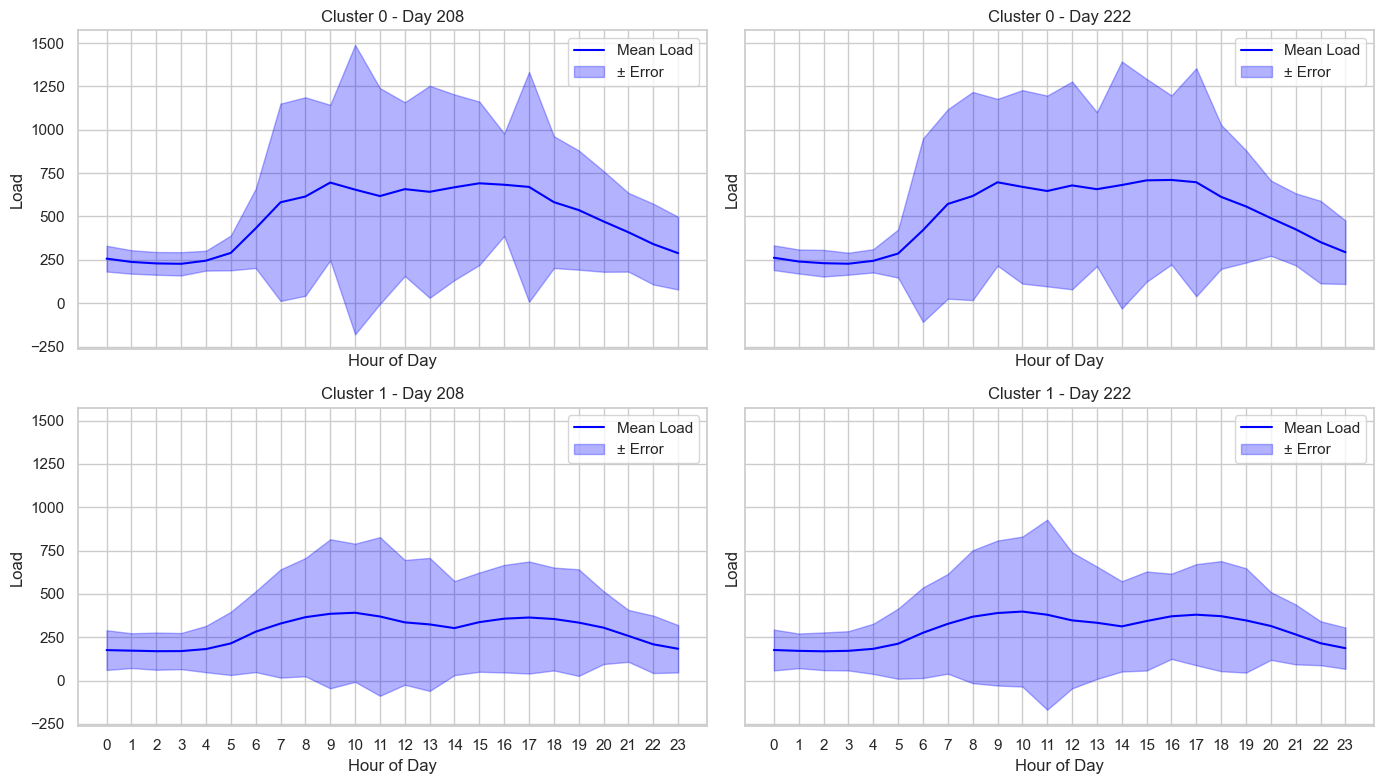

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Randomly select two distinct days
sample_days = df_mean_load_weekends['day_of_year'].drop_duplicates().sample(2).tolist()
clusters = [0, 1]

# Filter the data for selected days and clusters
plot_df = df_mean_load_weekends[df_mean_load_weekends['day_of_year'].isin(sample_days) & df_mean_load_weekends['cluster'].isin(clusters)]

sns.set(style='whitegrid')

fig, axs = plt.subplots(len(clusters), len(sample_days), figsize=(14, 8), sharex=True, sharey=True)

for i, cluster in enumerate(clusters):
    for j, day in enumerate(sample_days):
        ax = axs[i, j]
        data = plot_df[(plot_df['cluster'] == cluster) & (plot_df['day_of_year'] == day)]
        
        if data.empty:
            ax.set_title(f'Cluster {cluster} - Day {day} (No Data)')
            continue

        hours = data['hour']
        mean_load = data['mean_load']
        error = data['Variance']

        ax.plot(hours, mean_load, label='Mean Load', color='blue')
        ax.fill_between(hours, mean_load - error, mean_load + error, alpha=0.3, color='blue', label='± Error')

        ax.set_title(f'Cluster {cluster} - Day {day}')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Load')
        ax.set_xticks(range(0, 24))
        ax.legend()

plt.tight_layout()
plt.show()


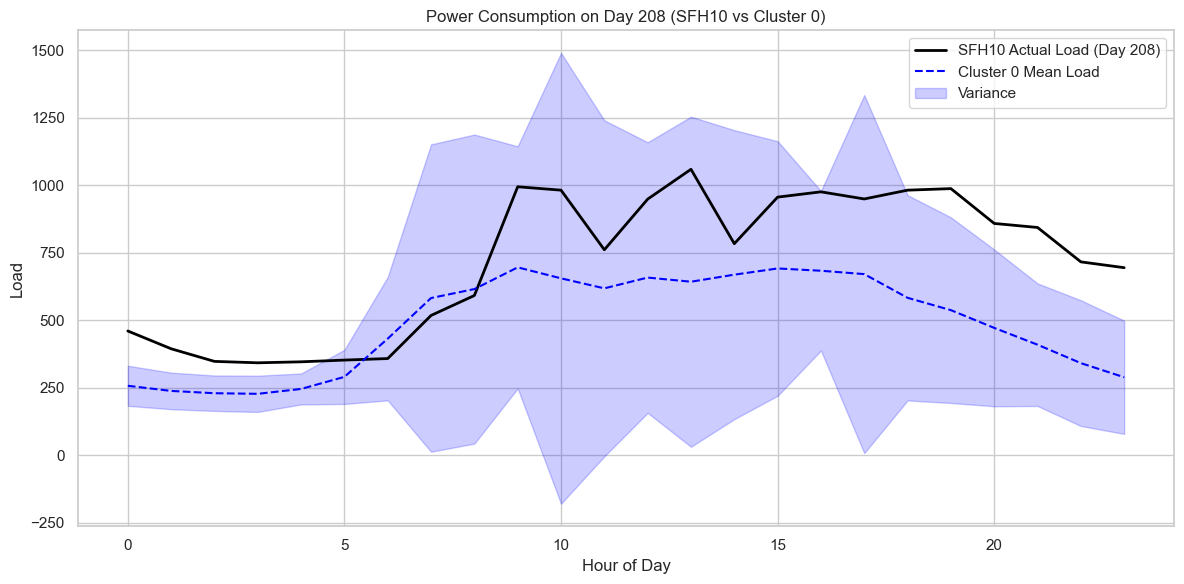

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Select a random day for SFH10
sfh10_data = df_weekend[df_weekend['household'] == 'SFH10']
random_day = np.random.choice(sfh10_data['day_of_year'].unique())

# 2. Extract actual hourly load for that day
actual_row = sfh10_data[sfh10_data['day_of_year'] == random_day]
actual_load = actual_row[[f'yb_{i}' for i in range(24)]].values.flatten()

# 3. Extract cluster 0's mean load and variance for that day
mean_data = df_mean_load_weekends[
    (df_mean_load_weekends['day_of_year'] == random_day) &
    (df_mean_load_weekends['cluster'] == 0)
].sort_values('hour')

hours = mean_data['hour']
mean_load = mean_data['mean_load']
std_dev =mean_data['Variance']

# 4. Plot
plt.figure(figsize=(12, 6))
plt.plot(hours, actual_load, label=f'SFH10 Actual Load (Day {random_day})', color='black', linewidth=2)
plt.plot(hours, mean_load, label='Cluster 0 Mean Load', color='blue', linestyle='--')
plt.fill_between(hours, mean_load - std_dev, mean_load + std_dev, color='blue', alpha=0.2, label='Variance')

plt.title(f"Power Consumption on Day {random_day} (SFH10 vs Cluster 0)")
plt.xlabel("Hour of Day")
plt.ylabel("Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
